<a href="https://colab.research.google.com/github/EllieMwangi/Track-popularity-prediction/blob/master/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spotify Data Analysis Project



## 1. Defining the Question

### Specifying the data analysis question

1. Explore and investigate various aspects and relationships of the data using data visualizations.
2. Spotify's revenues would increase if they were able to identify popular songs early on and provide them on their platform. Build a model that can predict track popularity.
3. Segment tracks into different genres and help identify new genres of music.

### Define Metrics of Success
1. The Root Mean Squared Error (RMSE) and the R-squared (R2) scores will be the metrics by which we evaluate the success of the track popularity prediction model.
2. Can successfully create clusters/segments with clear bounderies 

### Understanding Context

Spotify Technology is a Swedish music streaming and media services provider that provides an audio streaming platform, the "Spotify" platform, that offers DRM-restricted music and podcasts from record labels and media companies. 
The Spotify platform provides access to over 50 million tracks. Users can browse by parameters such as artist, album, or genre, and can create, edit, and share playlists. 

The service is available in most of Europe and the Americas, Australia, New Zealand, and parts of Africa and Asia, and on most modern devices, including Windows, macOS, and Linux computers, and iOS, and Android smartphones and tablets.

With this project, Spotify management seeks to meet the following objectives:
- Identify popular songs early on to upload them on the platform
- Identify any new emerging genres of music



### Recording Experimental Design
1. Define the research question
2. Data Importation
3. Data Exploration and Cleaning
4. Data Analysis (Univariate, Bivariate and Multivariate Analysis)
5. Feature Engineering
6. Data Preparation
7. Data Modeling
8. Model Evaluation
9. Recommendations / Conclusion
10.  Challenging your Solution

 ### Data Relevance

 The data for this project comes from Spotify via the spotifyr package by Charlie Thompson, Josiah Parry, Donal Phipps, and Tom Wolff. It is thus appropriate for answering the research question.
 

## 2. Exploratory Data Analysis


### Data Importation

In [4]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import datetime as dt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set_color_codes(palette='pastel')
plt.rcParams['figure.figsize'] = (10.0, 8.0)

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
# Load datasets
spotify_df = pd.read_csv('https://bit.ly/SpotifySongsDs')
glossary = pd.read_csv('spotify_glossary.csv')

### 2. Data Exploration

In [7]:
# Preview 5 first records
spotify_df.head(5)

track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxury...               2019-06-14   
1                    Memories (Dillon Francis Remix)               2019-12-13   
2                    All the Time (Don Diablo Remix)               2019-07-05   
3                        Call You Mine - The Remixes               2019-07-19   
4            Someone You Loved (Future Humans Remix)               2019-03-05   

  playlist_name             playlist_id playlist_genre playlist_subgenre  \
0     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   
1     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   
2     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   
3     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   
4     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.748   0.916    6    -2.634     1       0.0583        0.1020   
1         0.726   0.815   11    -4.969     1       0.0373        0.0724   
2         0.675   0.931    1    -3.432     0       0.0742        0.0794   
3         0.718   0.930    7    -3.778     1       0.1020        0.0287   
4         0.650   0.833    1    -4.672     1       0.0359        0.0803   

   instrumentalness  liveness  valence    tempo  duration_ms  
0          0.000000    0.0653    0.518  122.036       194754  
1          0.004210    0.3570    0.693   99.972       162600  
2          0.000023    0.1100    0.613  124.008       176616  
3          0.000009    0.2040    0.277  121.956       169093  
4          0.000000    0.0833    0.725  123.976       189052

In [8]:
#Preview last five records
spotify_df.tail()

track_id                            track_name  \
32828  7bxnKAamR3snQ1VGLuVfC1  City Of Lights - Official Radio Edit   
32829  5Aevni09Em4575077nkWHz   Closer - Sultan & Ned Shepard Remix   
32830  7ImMqPP3Q1yfUHvsdn7wEo          Sweet Surrender - Radio Edit   
32831  2m69mhnfQ1Oq6lGtXuYhgX        Only For You - Maor Levi Remix   
32832  29zWqhca3zt5NsckZqDf6c                Typhoon - Original Mix   

         track_artist  track_popularity          track_album_id  \
32828    Lush & Simon                42  2azRoBBWEEEYhqV6sb7JrT   
32829  Tegan and Sara                20  6kD6KLxj7s8eCE3ABvAyf5   
32830     Starkillers                14  0ltWNSY9JgxoIZO4VzuCa6   
32831          Mat Zo                15  1fGrOkHnHJcStl14zNx8Jy   
32832    Julian Calor                27  0X3mUOm6MhxR7PzxG95rAo   

                   track_album_name track_album_release_date    playlist_name  \
32828    City Of Lights (Vocal Mix)               2014-04-28  ♥ EDM LOVE 2020   
32829                Closer Remixed               2013-03-08  ♥ EDM LOVE 2020   
32830  Sweet Surrender (Radio Edit)               2014-04-21  ♥ EDM LOVE 2020   
32831        Only For You (Remixes)               2014-01-01  ♥ EDM LOVE 2020   
32832                 Typhoon/Storm               2014-03-03  ♥ EDM LOVE 2020   

                  playlist_id playlist_genre          playlist_subgenre  \
32828  6jI1gFr6ANFtT8MmTvA2Ux            edm  progressive electro house   
32829  6jI1gFr6ANFtT8MmTvA2Ux            edm  progressive electro house   
32830  6jI1gFr6ANFtT8MmTvA2Ux            edm  progressive electro house   
32831  6jI1gFr6ANFtT8MmTvA2Ux            edm  progressive electro house   
32832  6jI1gFr6ANFtT8MmTvA2Ux            edm  progressive electro house   

       danceability  energy  key  loudness  mode  speechiness  acousticness  \
32828         0.428   0.922    2    -1.814     1       0.0936      0.076600   
32829         0.522   0.786    0    -4.462     1       0.0420      0.001710   
32830         0.529   0.821    6    -4.899     0       0.0481      0.108000   
32831         0.626   0.888    2    -3.361     1       0.1090      0.007920   
32832         0.603   0.884    5    -4.571     0       0.0385      0.000133   

       instrumentalness  liveness  valence    tempo  duration_ms  
32828          0.000000    0.0668   0.2100  128.170       204375  
32829          0.004270    0.3750   0.4000  128.041       353120  
32830          0.000001    0.1500   0.4360  127.989       210112  
32831          0.127000    0.3430   0.3080  128.008       367432  
32832          0.341000    0.7420   0.0894  127.984       337500

In [9]:
#Sample five records
spotify_df.sample(10)

track_id                             track_name  \
16449  4IeogZMcSklkHiUvVj3Rlr                        Raúl en el Baúl   
19774  2QrXzOqLCVDRZHkToA0tSR                          Never Go Back   
30829  6tBvw9TfPXY7sIcgg3EZWE                         One True House   
3914   0SWgjMbFFzariuvxAxbybu          Give Me Sunshine - Jerome Dub   
20887  4NUgjW9bM2c21LzUvrvUPc      10 Punten (feat. Hef & Valsbezig)   
8324   7bn5WFv9CmhcrsYb3Krgun                            Head Motion   
32471  73nYqSz1U08iCWfdnG65KV    Like I Love You - Keanu Silva Remix   
6524   7EExHTWWXsZxhugGaGGh1O                                 Fondue   
3304   1KtD0xaLAikgIt5tPbteZQ  Thinking About You (feat. Ayah Marar)   
2450   0LzkyidnSi4N2k4CVm9Jrn                                 P.D.R.   

              track_artist  track_popularity          track_album_id  \
16449          India Marte                41  43jk8gnCO6C0YenwPZpIhv   
19774         Dennis Lloyd                74  5EqITahBSjWcU71mbhFPEf   
30829                   AW                42  0o46PQ8v9Um1dZiqL2yXoO   
3914   Santa Maradona F.C.                 8  1vWVS6bAKYvIGjQlyabdpT   
20887      Nafthaly Ramona                45  08PgVUozsmyAf6U98Cz2yE   
8324      Wreckshop Family                 0  2Duo3nIfApK6qnBvHwNitZ   
32471     Lost Frequencies                19  1qf1ypMorzBN7jzJ3rflSX   
6524                 Dweeb                11  3IFbzO8kMa6Lmx3R8HGjFN   
3304         Calvin Harris                67  7w19PFbxAjwZ7UVNp9z0uT   
2450          The Bergamot                18  54giEuxyxwkAFOzxyxTbOK   

                        track_album_name track_album_release_date  \
16449                    Raúl en el Baúl               2019-06-21   
19774                      Never Go Back               2019-02-15   
30829                     One True House               2019-10-03   
3914                    Give Me Sunshine               2014-10-17   
20887  10 Punten (feat. Hef & Valsbezig)               2018-08-24   
8324                      Hitlist Vol. 4               2004-01-01   
32471          Like I Love You (Remixes)               2018-12-07   
6524                       Untitled VIII               2018-10-22   
3304                           18 Months               2012-10-26   
2450                            Mayflies               2019-09-19   

                                           playlist_name  \
16449                                     Vibra Tropical   
19774     2020 Hits & 2019  Hits – Top Global Tracks 🔥🔥🔥   
30829             Tastemakers Ball  -  EDM - POP and FUN   
3914                                Chillout & Remixes 💜   
20887  🔥🦁 GOOD VIBES ONLY 🦁🔥 // BROEDERLIEFDE || FREN...   
8324                                  3rd Coast Classics   
32471  Fresh EDM | Progressive House | Electro House ...   
6524                                        Lofi Hip-Hop   
3304       Mix ElectroPop//ElectroHouse// DeepHouse 2020   
2450                            Electro Pop | Electropop   

                  playlist_id playlist_genre          playlist_subgenre  \
16449  37i9dQZF1DX3fXJqxGjuEP          latin                   tropical   
19774  4JkkvMpVl4lSioqQjeAL0q          latin              latin hip hop   
30829  67cpuBAXjwibm3LG333Oaq            edm                    pop edm   
3914   4NlAd9NpIa92IjErMyAriM            pop            indie poptimism   
20887  1d0fonZHpN4LYHTKbmNRbm          latin              latin hip hop   
8324   1QJ66s6YBZgxMUaVUyrhbo            rap           southern hip hop   
32471  0FCHg9zJMNNiOokh3hVcxd            edm  progressive electro house   
6524   37i9dQZF1DX36Xw4IJIVKA            rap                    hip hop   
3304   23swqzpOZwW1NhPiZ7iyFI            pop                 electropop   
2450   2a5i2ZtEXGKwVGL16J8N0p            pop                 electropop   

       danceability  energy  key  loudness  mode  speechiness  acousticness  \
16449         0.699   0.544    9    -9.901     0       0.0544       0.01120   
19774         0.421   0.653   

In [10]:
glossary

Variable  class  \
0                   track_id    str   
1                 track_name    str   
2               track_artist    str   
3           track_popularity  float   
4             track_album_id    str   
5           track_album_name    str   
6   track_album_release_date    str   
7              playlist_name    str   
8                playlist_id    str   
9             playlist_genre    str   
10         playlist_subgenre    str   
11              danceability  float   
12                    Energy  float   
13                       Key  float   
14                  Loudness  float   
15                      Mode  float   
16               Speechiness  float   
17              Acousticness  float   
18          Instrumentalness  float   
19                  Liveness  float   
20                   Valence  float   
21                     Tempo  float   
22               duration_ms  float   

                                          description  
0                                      Song unique ID  
1                                           Song Name  
2                                         Song Artist  
3      Song Popularity (0-100) where higher is better  
4                                     Album unique ID  
5                                     Song album name  
6                            Date when album released  
7                                    Name of playlist  
8                                         Playlist ID  
9                                      Playlist genre  
10                                  Playlist subgenre  
11  Danceability describes how suitable a track is...  
12  Energy is a measure from 0.0 to 1.0 and repres...  
13  The estimated overall key of the track. Intege...  
14  The overall loudness of a track in decibels (d...  
15  Mode indicates the modality (major or minor) o...  
16  Speechiness detects the presence of spoken wor...  
17  A confidence measure from 0.0 to 1.0 of whethe...  
18  Predicts whether a track contains no vocals. “...  
19  Detects the presence of an audience in the rec...  
20  A measure from 0.0 to 1.0 describing the music...  
21  The overall estimated tempo of a track in beat...  
22                   Duration of song in milliseconds

In [11]:
# Check dataset shape
spotify_df.shape

(32833, 23)

In [12]:
# Investigate data set info
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

### 3. Data Cleaning

In [13]:
# Check for missing values
spotify_df.isnull().sum().sort_values(ascending=False)

track_name                  5
track_artist                5
track_album_name            5
duration_ms                 0
playlist_subgenre           0
track_popularity            0
track_album_id              0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
danceability                0
tempo                       0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
track_id                    0
dtype: int64

In [14]:
#Return rows with null values
spotify_df[spotify_df.isnull().any(axis=1)]

track_id track_name track_artist  track_popularity  \
8151   69gRFGOWY9OMpFJgFol1u0        NaN          NaN                 0   
9282   5cjecvX0CmC9gK0Laf5EMQ        NaN          NaN                 0   
9283   5TTzhRSWQS4Yu8xTgAuq6D        NaN          NaN                 0   
19568  3VKFip3OdAvv4OfNTgFWeQ        NaN          NaN                 0   
19811  69gRFGOWY9OMpFJgFol1u0        NaN          NaN                 0   

               track_album_id track_album_name track_album_release_date  \
8151   717UG2du6utFe7CdmpuUe3              NaN               2012-01-05   
9282   3luHJEPw434tvNbme3SP8M              NaN               2017-12-01   
9283   3luHJEPw434tvNbme3SP8M              NaN               2017-12-01   
19568  717UG2du6utFe7CdmpuUe3              NaN               2012-01-05   
19811  717UG2du6utFe7CdmpuUe3              NaN               2012-01-05   

            playlist_name             playlist_id playlist_genre  \
8151              HIP&HOP  5DyJsJZOpMJh34WvUrQzMV            rap   
9282          GANGSTA Rap  5GA8GDo7RQC3JEanT81B3g            rap   
9283          GANGSTA Rap  5GA8GDo7RQC3JEanT81B3g            rap   
19568  Reggaeton viejito🔥  0si5tw70PIgPkY1Eva6V8f          latin   
19811       latin hip hop  3nH8aytdqNeRbcRCg3dw9q          latin   

      playlist_subgenre  danceability  energy  key  loudness  mode  \
8151   southern hip hop         0.714   0.821    6    -7.635     1   
9282       gangster rap         0.678   0.659   11    -5.364     0   
9283       gangster rap         0.465   0.820   10    -5.907     0   
19568         reggaeton         0.675   0.919   11    -6.075     0   
19811     latin hip hop         0.714   0.821    6    -7.635     1   

       speechiness  acousticness  instrumentalness  liveness  valence  \
8151        0.1760        0.0410           0.00000    0.1160    0.649   
9282        0.3190        0.0534           0.00000    0.5530    0.191   
9283        0.3070        0.0963           0.00000    0.0888    0.505   
19568       0.0366        0.0606           0.00653    0.1030    0.726   
19811       0.1760        0.0410           0.00000    0.1160    0.649   

         tempo  duration_ms  
8151    95.999       282707  
9282   146.153       202235  
9283    86.839       206465  
19568   97.017       252773  
19811   95.999       282707

Tracks with null name, artist and album name columns are from albums with ids:
- 717UG2du6utFe7CdmpuUe3
- 3luHJEPw434tvNbme3SP8M

In [15]:
# Check if there are other tracks with these album ids:
spotify_df[spotify_df.track_album_id == '3luHJEPw434tvNbme3SP8M']

track_id track_name track_artist  track_popularity  \
9282  5cjecvX0CmC9gK0Laf5EMQ        NaN          NaN                 0   
9283  5TTzhRSWQS4Yu8xTgAuq6D        NaN          NaN                 0   

              track_album_id track_album_name track_album_release_date  \
9282  3luHJEPw434tvNbme3SP8M              NaN               2017-12-01   
9283  3luHJEPw434tvNbme3SP8M              NaN               2017-12-01   

     playlist_name             playlist_id playlist_genre playlist_subgenre  \
9282   GANGSTA Rap  5GA8GDo7RQC3JEanT81B3g            rap      gangster rap   
9283   GANGSTA Rap  5GA8GDo7RQC3JEanT81B3g            rap      gangster rap   

      danceability  energy  key  loudness  mode  speechiness  acousticness  \
9282         0.678   0.659   11    -5.364     0        0.319        0.0534   
9283         0.465   0.820   10    -5.907     0        0.307        0.0963   

      instrumentalness  liveness  valence    tempo  duration_ms  
9282               0.0    0.5530    0.191  146.153       202235  
9283               0.0    0.0888    0.505   86.839       206465

In [16]:
spotify_df[spotify_df.track_album_id == '717UG2du6utFe7CdmpuUe3']

track_id track_name track_artist  track_popularity  \
8151   69gRFGOWY9OMpFJgFol1u0        NaN          NaN                 0   
19568  3VKFip3OdAvv4OfNTgFWeQ        NaN          NaN                 0   
19811  69gRFGOWY9OMpFJgFol1u0        NaN          NaN                 0   

               track_album_id track_album_name track_album_release_date  \
8151   717UG2du6utFe7CdmpuUe3              NaN               2012-01-05   
19568  717UG2du6utFe7CdmpuUe3              NaN               2012-01-05   
19811  717UG2du6utFe7CdmpuUe3              NaN               2012-01-05   

            playlist_name             playlist_id playlist_genre  \
8151              HIP&HOP  5DyJsJZOpMJh34WvUrQzMV            rap   
19568  Reggaeton viejito🔥  0si5tw70PIgPkY1Eva6V8f          latin   
19811       latin hip hop  3nH8aytdqNeRbcRCg3dw9q          latin   

      playlist_subgenre  danceability  energy  key  loudness  mode  \
8151   southern hip hop         0.714   0.821    6    -7.635     1   
19568         reggaeton         0.675   0.919   11    -6.075     0   
19811     latin hip hop         0.714   0.821    6    -7.635     1   

       speechiness  acousticness  instrumentalness  liveness  valence   tempo  \
8151        0.1760        0.0410           0.00000     0.116    0.649  95.999   
19568       0.0366        0.0606           0.00653     0.103    0.726  97.017   
19811       0.1760        0.0410           0.00000     0.116    0.649  95.999   

       duration_ms  
8151        282707  
19568       252773  
19811       282707

No other tracks have similar album ids

In [17]:
# Drop rows with missing values
spotify_df.dropna(inplace=True)

In [18]:
spotify_df[spotify_df.isnull().any(axis=1)]

Empty DataFrame
Columns: [track_id, track_name, track_artist, track_popularity, track_album_id, track_album_name, track_album_release_date, playlist_name, playlist_id, playlist_genre, playlist_subgenre, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms]
Index: []

In [19]:
# Check for duplicates
spotify_df.duplicated().sum()

0

Zero duplicate records

### 4. Data Analysis

#### a) Univariate Analysis

In [20]:
# Perform univariate analysis on the numeric variables
num_var = spotify_df.select_dtypes(include=['float64','int64']).columns.to_list()
num_var

['track_popularity',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms']

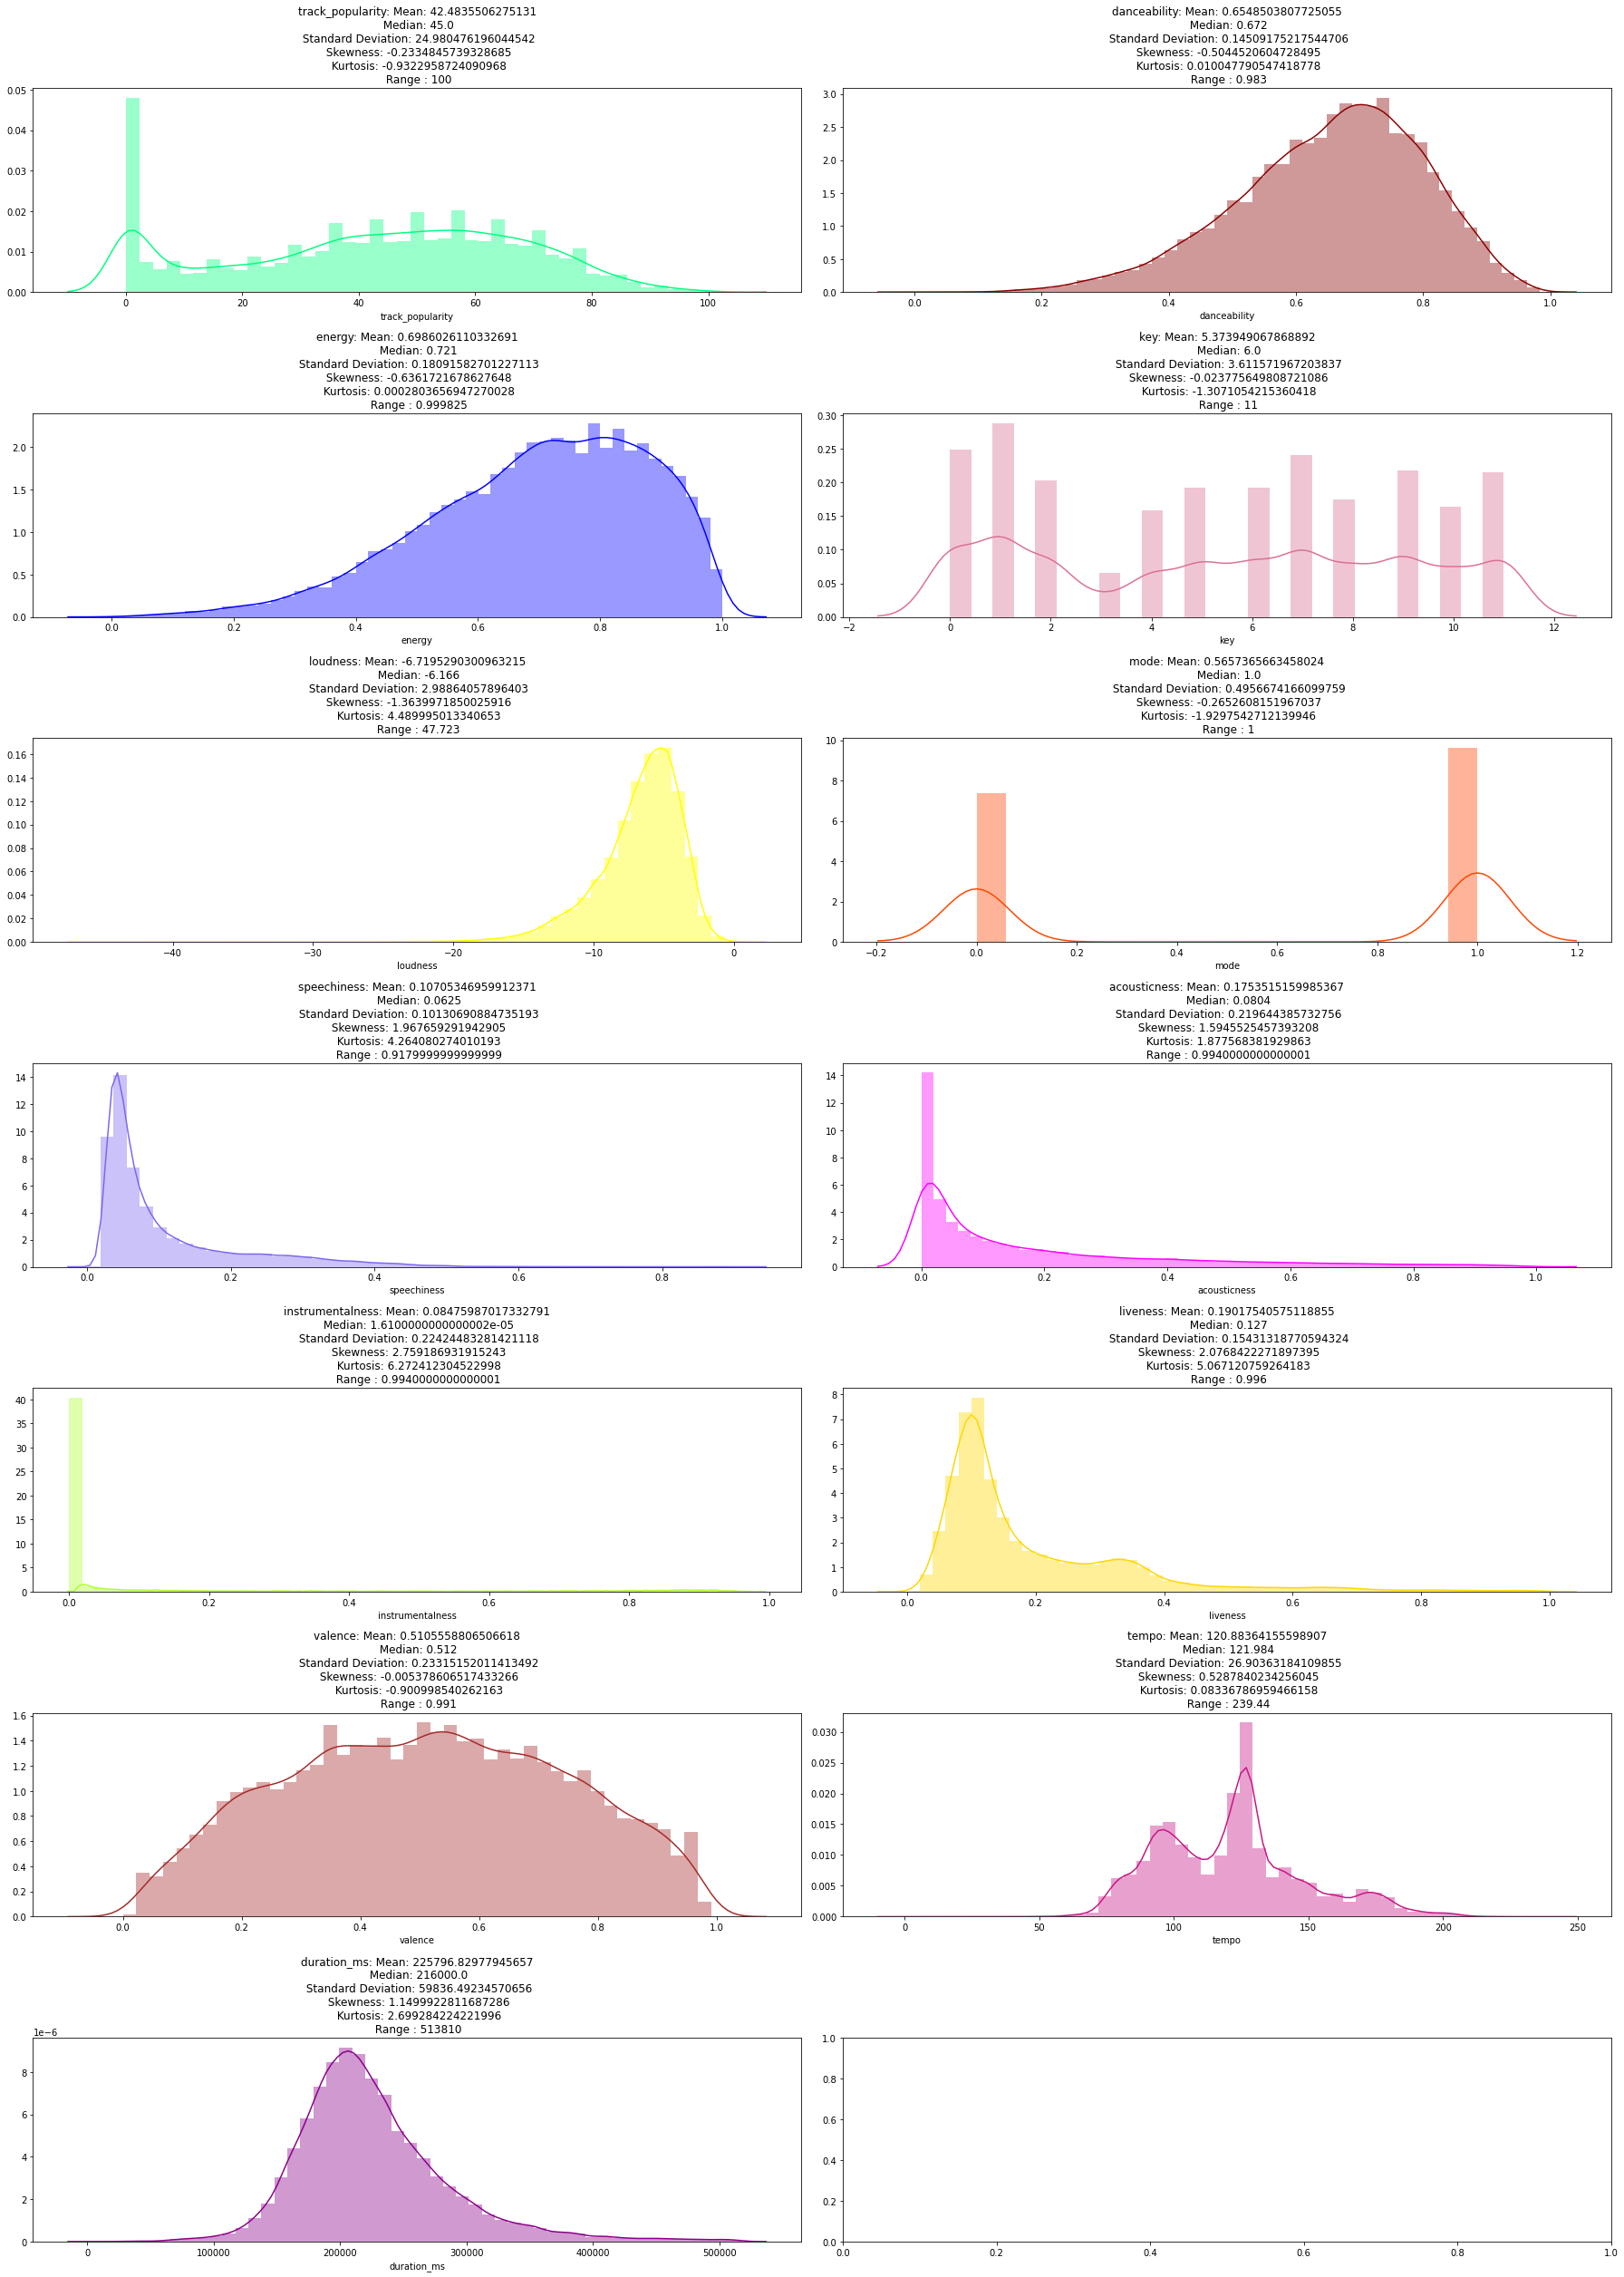

In [21]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(25, 35))
colors = ['#00FF7F', '#8B0000', '#0000FF', '#DB7093', '#FFFF00', '#FF4500', '#7B68EE', '#FF00FF',
          '#ADFF2F', '#FFD700', '#A52A2A', '#C71585', '#8B008B']

for col, colour, ax in zip(num_var, colors, axes.flatten()):

  mean = spotify_df[col].mean()
  median = spotify_df[col].median()
  standard_var = spotify_df[col].std()
  skew = spotify_df[col].skew()
  kurt = spotify_df[col].kurt()
  range = spotify_df[col].max() - spotify_df[col].min()

  sns.distplot(spotify_df[col], hist=True, ax=ax, color=colour)
  ax.set_title(f'{col}: Mean: {mean}\n Median: {median}\n Standard Deviation: {standard_var}\n Skewness: {skew}\n Kurtosis: {kurt}\n Range : {range}')

plt.tight_layout()
  

- The valence and track attributes are the only attributes with a moderately normal distribution. 
- Acousticness, duration_ms, instrumentalness, speechiness and liveness are heavily skewed to the right. 
- Danceability, energy and loudness are negatively skewed
- The mode attribute is binary and can either be 0 or 1
- Investigate if the key attribute is categorical
- Instrumentalness, speechiness, loudness and liveness are leptokurtic. Could this be outliers?

In [22]:
# Check if mode and key are categorical
spotify_df['mode'].value_counts()

1    18572
0    14256
Name: mode, dtype: int64

In [23]:
spotify_df['key'].value_counts()

1     4010
0     3454
7     3352
9     3027
11    2994
2     2827
5     2680
6     2668
8     2430
10    2272
4     2201
3      913
Name: key, dtype: int64

**Investigate duration variable**
- Is there a relationship between the length of a song and its popularity?

In [24]:
# Create duration in minutes column
spotify_df['duration_min'] = spotify_df.duration_ms / 60000

In [25]:
spotify_df.duration_min.describe()

count    32828.000000
mean         3.763280
std          0.997275
min          0.066667
25%          3.130075
50%          3.600000
75%          4.226354
max          8.630167
Name: duration_min, dtype: float64

Average duration of a song is 3.6 minutes. The shortest song is approximately 4 seconds while the longest song is around 8.6 minutes

In [26]:
range = spotify_df.duration_min.max() - spotify_df.duration_min.min()
range

8.5635

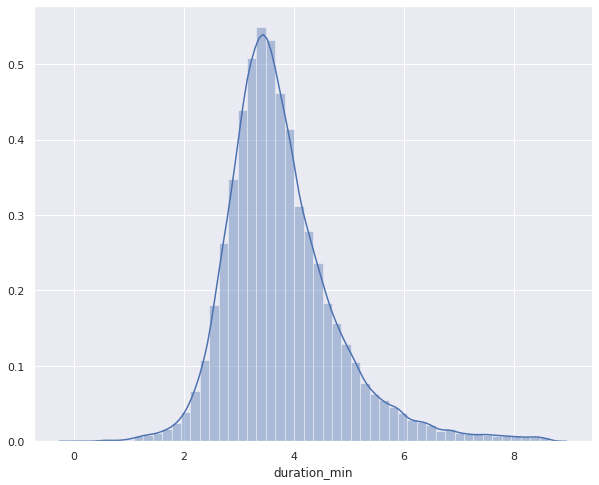

In [27]:
# Plot histogram of distribution of song durations
sns.set()
plt.figure(figsize=(10,8))
sns.distplot(spotify_df.duration_min, kde=True, bins=50)

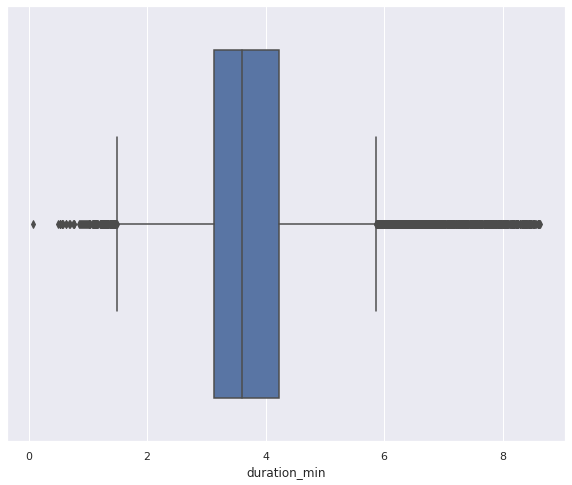

In [28]:
sns.boxplot(x = spotify_df.duration_min)

There is quite a large number of points that are outside the range. Could this be outliers?

In [29]:
# Create summary table of duration data
duration_table = spotify_df[['duration_min','track_popularity','playlist_genre','track_name']]

In [30]:
# Round off time variable
duration_table['round_time'] = duration_table['duration_min'].apply(round)

In [31]:
duration_table.groupby(['round_time'])['track_popularity'].mean().sort_values(ascending=False)

round_time
3    45.576905
2    43.690012
4    42.770667
9    37.238095
5    37.079737
1    33.514706
6    31.703883
7    29.872500
8    27.768519
0     0.000000
Name: track_popularity, dtype: float64

Songs that are roughly three minutes in length have the highest average popularity. However, it is interesting that songs that are roughly 9 minutes have a fairly large popularity score ranking 4th. Song length is therefore not a predominant factor in determining song popularity

In [32]:
# Investigate songs with a song length greater than 8 minutes
duration_table[ duration_table.round_time > 8]['playlist_genre'].value_counts()

rock     14
edm       4
latin     3
Name: playlist_genre, dtype: int64

In [33]:
duration_table[ duration_table.round_time > 8]

duration_min  track_popularity playlist_genre  \
11678      8.538000                30           rock   
11770      8.618750                63           rock   
11824      8.523333                15           rock   
11914      8.597783                71           rock   
11919      8.599333                48           rock   
12379      8.614883                73           rock   
12391      8.618750                63           rock   
12400      8.523333                15           rock   
12585      8.550000                61           rock   
13080      8.557333                 2           rock   
13476      8.521550                 7           rock   
13556      8.597783                71           rock   
14173      8.515550                19           rock   
16038      8.533333                 2           rock   
19381      8.534883                71          latin   
20643      8.612667                28          latin   
21327      8.630167                64          latin   
31131      8.595050                15            edm   
31634      8.535000                46            edm   
31660      8.594667                 0            edm   
32615      8.505333                18            edm   

                                            track_name  round_time  
11678                             The First Rebreather           9  
11770                          Kashmir - 2012 Remaster           9  
11824  Won't Get Fooled Again - Original Album Version           9  
11914                                     American Pie           9  
11919                       Roundabout - 2008 Remaster           9  
12379                                     American Pie           9  
12391                          Kashmir - 2012 Remaster           9  
12400  Won't Get Fooled Again - Original Album Version           9  
12585                   Won't Get Fooled Again - Remix           9  
13080  Won't Get Fooled Again - Original Album Version           9  
13476  Won't Get Fooled Again - Original Album Version           9  
13556                                     American Pie           9  
14173                                Money For Nothing           9  
16038  Won't Get Fooled Again - Original Album Version           9  
19381                                      Darte Remix           9  
20643                  Jam On It (Re-Recorded Version)           9  
21327                                       47 - Remix           9  
31131                                  Come as You Are           9  
31634        Too Much Information - Laolu Remix (Edit)           9  
31660                                    Summer Groove           9  
32615                                  Hypnotic Energy           9

Songs within a duration 8 minutes are predominantly rock songs, they also seem to mostly remixes

In [34]:
# Investigate songs with a song length lesser than 1 minute
duration_table[ duration_table.round_time < 1]['playlist_genre'].value_counts()

rock    1
rap     1
Name: playlist_genre, dtype: int64

In [35]:
# Get songs with a duration that is less than 30 seconds
duration_table[duration_table.round_time == 0]

duration_min  track_popularity playlist_genre             track_name  \
8339       0.491550                 0            rap   The Screwed Up Click   
11363      0.066667                 0           rock  Hi, How're You Doin'?   

       round_time  
8339            0  
11363           0

In [36]:
spotify_df.loc[spotify_df['track_name'] == "Hi, How're You Doin'?"]

track_id             track_name      track_artist  \
11363  51w6nRCU68klqNfYaaVP2j  Hi, How're You Doin'?  DREAMS COME TRUE   

       track_popularity          track_album_id  track_album_name  \
11363                 0  4wdK52JVu5GzhxW3RCZ3AV  Dreams Come True   

      track_album_release_date          playlist_name             playlist_id  \
11363               1989-03-21  City Pop 1985 シティーポップ  3j2osvmecEao5nmo9jZ5df   

      playlist_genre playlist_subgenre  danceability  energy  key  loudness  \
11363           rock        album rock           0.0   0.315    1   -26.087   

       mode  speechiness  acousticness  instrumentalness  liveness  valence  \
11363     1          0.0           0.0               0.0       0.0      0.0   

       tempo  duration_ms  duration_min  
11363    0.0         4000      0.066667

Despite the disturbingly short length, album intros and interludes predominantly short in length, hence this length is entirely feasible.

In [37]:
# investigate popularity feature
spotify_df['track_popularity'].describe()

count    32828.000000
mean        42.483551
std         24.980476
min          0.000000
25%         24.000000
50%         45.000000
75%         62.000000
max        100.000000
Name: track_popularity, dtype: float64

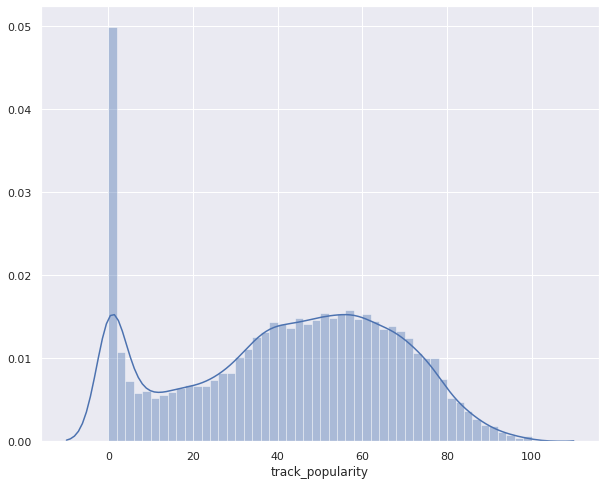

In [38]:
#Plot histogram of popularity variable
plt.figure(figsize=(10,8))
sns.distplot(spotify_df.track_popularity, bins=50)

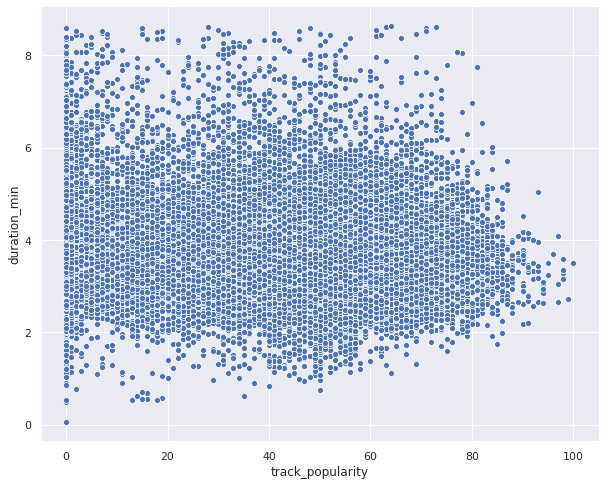

In [39]:
# Is there a correlation between song length and song popularity
sns.scatterplot(x ='track_popularity', y='duration_min', data = spotify_df)

Relationship between song duration and track popularity is not clear backing the discovery made above that song duration does not influence song popularity.

In [40]:
#Check for correlation between track duration and popularity
spotify_df.duration_min.corr(spotify_df.track_popularity, method='pearson')

-0.14363421002518284

As pearson correlation assumes normal distribution, check for spearman correlation

In [41]:
spotify_df.duration_min.corr(spotify_df.track_popularity, method='spearman')

-0.12063860814928071

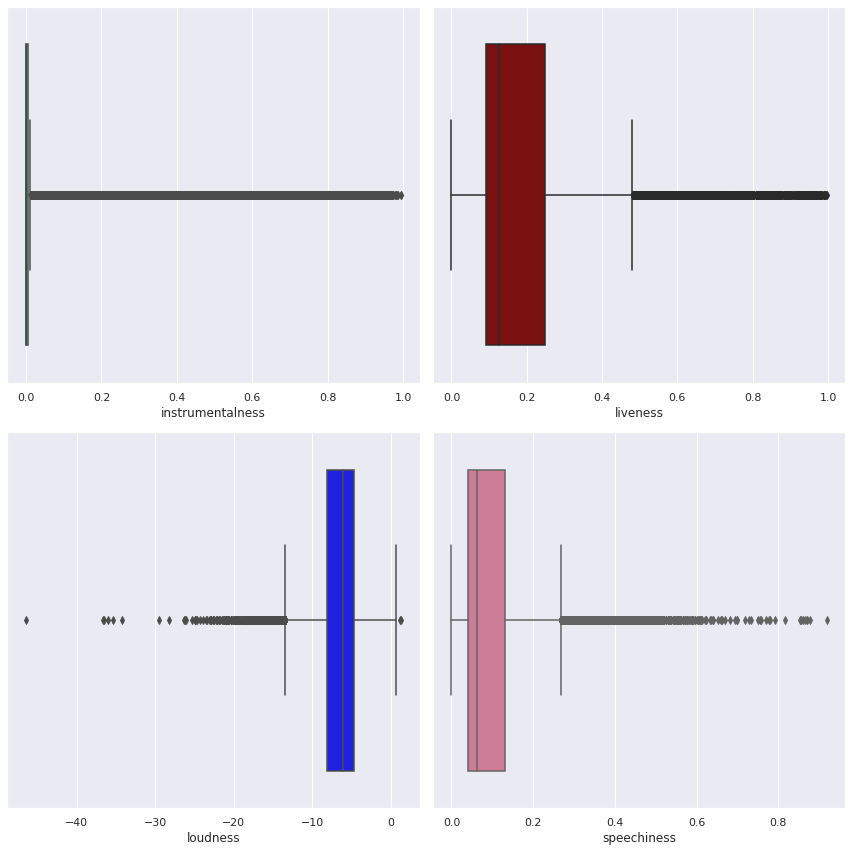

In [42]:
# Plot boxplots for features that are leptokurtic: Instrumentalness, speechiness, loudness and liveness 

leptokurtic_var = ['instrumentalness', 'liveness', 'loudness', 'speechiness']
colors = ['#00FF7F', '#8B0000', '#0000FF', '#DB7093']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,12))

for col, color, ax in zip(leptokurtic_var, colors, axes.flatten()):
  sns.boxplot(spotify_df[col], ax=ax, color=color)

plt.tight_layout()

#### b) Multivariate Analysis

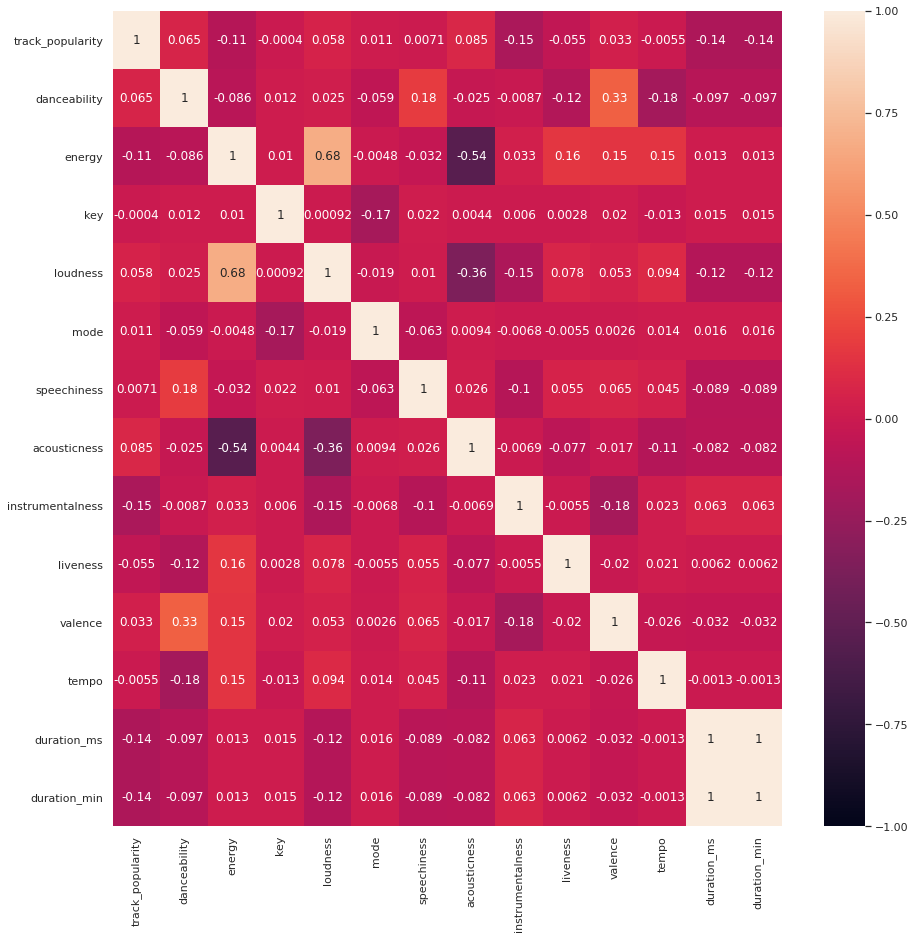

In [43]:
# Create correlation matrix of numeric variables
pearson_corr = spotify_df.corr(method='pearson')

# Plot correlation matrix
plt.figure(figsize=(15,15))
sns.heatmap(pearson_corr, vmin=-1, vmax=1, annot=True)

All numeric variables have little correlation with the track_popularity target variable. 
Variables with significant correlation are:
- loudness and energy - 0.68
- acousticness and enery - 0.54

However, pearson correlation assumes normal correlation which most variables don't have. 

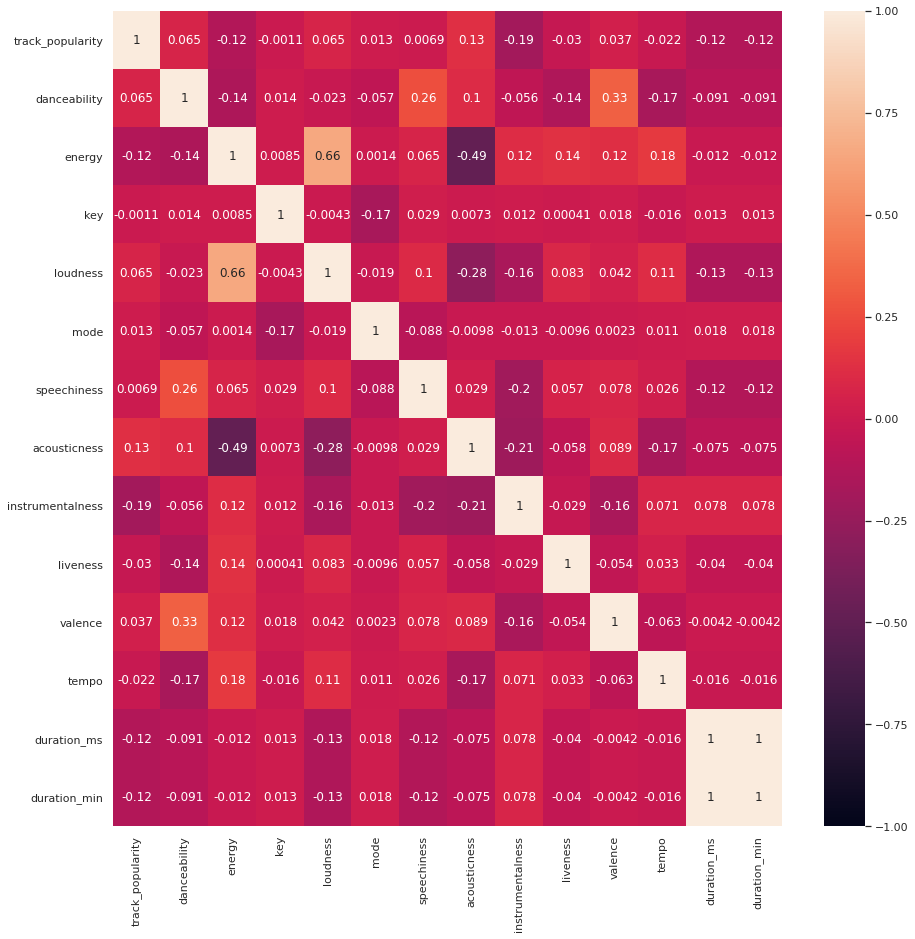

In [44]:
spearman_corr = spotify_df.corr(method='spearman')

# Plot correlation matrix
plt.figure(figsize=(15,15))
sns.heatmap(spearman_corr, vmin=-1, vmax=1, annot=True)

With spearman correlation, there is better view of a weak correlation between :
- danceabilty and valence
- danceability and speechiness

In [45]:
# Test for multicollinearity
spearman_corr.drop(['duration_min','track_popularity'], axis=1, inplace=True)
spearman_corr.drop(['duration_min','track_popularity'], axis=0, inplace=True)
vif = pd.DataFrame(np.linalg.inv(spearman_corr), index = spearman_corr.index, columns=spearman_corr.columns)
vif



danceability    energy       key  loudness      mode  \
danceability          1.341679  0.406039  0.004692 -0.207938  0.039231   
energy                0.406039  2.552510 -0.022992 -1.487078 -0.026986   
key                   0.004692 -0.022992  1.030832  0.015639  0.172407   
loudness             -0.207938 -1.487078  0.015639  2.062937  0.039826   
mode                  0.039231 -0.026986  0.172407  0.039826  1.040182   
speechiness          -0.350110 -0.197308 -0.019478  0.058667  0.081906   
acousticness          0.063060  0.709239 -0.012536 -0.020328  0.009919   
instrumentalness     -0.150960 -0.477224 -0.013656  0.529318  0.040394   
liveness              0.137246 -0.168993  0.001706  0.042423  0.011999   
valence              -0.468815 -0.523032 -0.017375  0.246981 -0.017553   
tempo                 0.174145 -0.088573  0.015470 -0.028085 -0.007002   
duration_ms           0.078099 -0.076062 -0.016315  0.205039 -0.004450   

                  speechiness  acousticness  instrumentalness  liveness  \
danceability        -0.350110      0.063060         -0.150960  0.137246   
energy              -0.197308      0.709239         -0.477224 -0.168993   
key                 -0.019478     -0.012536         -0.013656  0.001706   
loudness             0.058667     -0.020328          0.529318  0.042423   
mode                 0.081906      0.009919          0.040394  0.011999   
speechiness          1.167889     -0.041238          0.247157 -0.076249   
acousticness        -0.041238      1.414084          0.165924 -0.010118   
instrumentalness     0.247157      0.165924          1.264001  0.050243   
liveness            -0.076249     -0.010118          0.050243  1.048310   
valence              0.081336     -0.196823          0.253393  0.045809   
tempo               -0.077800      0.101492         -0.055283  0.014135   
duration_ms          0.091466      0.098934         -0.002295  0.044630   

                   valence     tempo  duration_ms  
danceability     -0.468815  0.174145     0.078099  
energy           -0.523032 -0.088573    -0.076062  
key              -0.017375  0.015470    -0.016315  
loudness          0.246981 -0.028085     0.205039  
mode             -0.017553 -0.007002    -0.004450  
speechiness       0.081336 -0.077800     0.091466  
acousticness     -0.196823  0.101492     0.098934  
instrumentalness  0.253393 -0.055283    -0.002295  
liveness          0.045809  0.014135     0.044630  
valence           1.263775  0.010271    -0.032317  
tempo             0.010271  1.071979     0.030983  
duration_ms      -0.032317  0.030983     1.055025

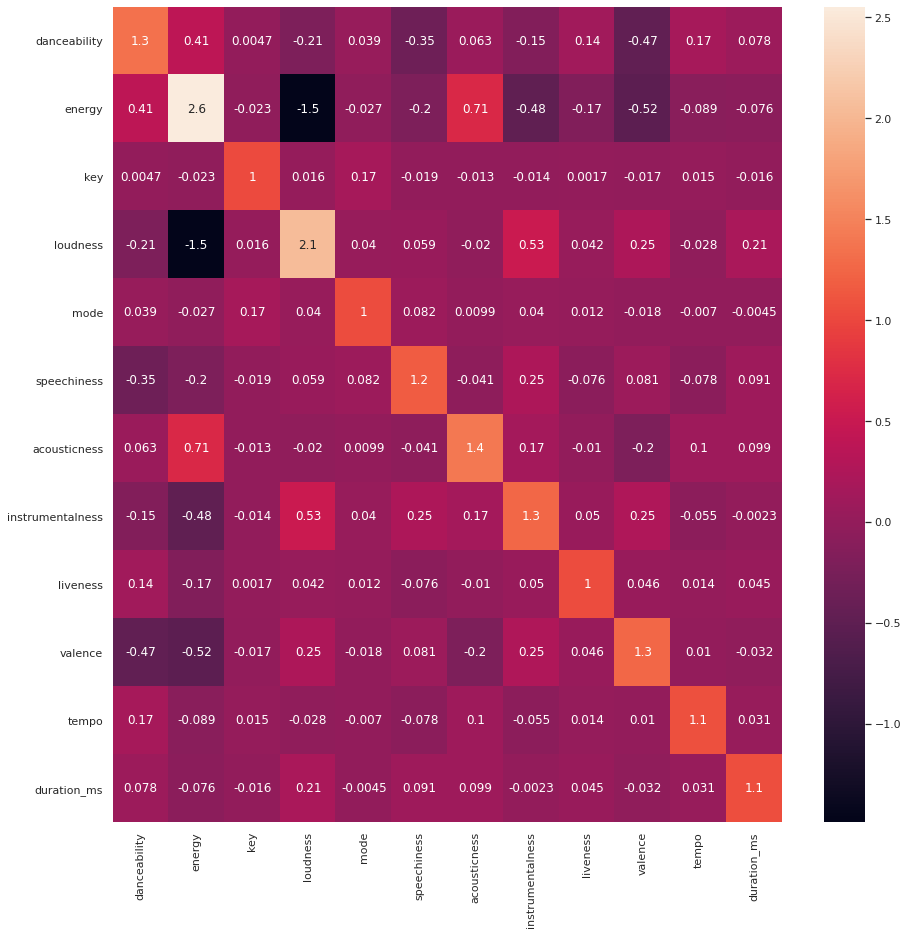

In [46]:
plt.figure(figsize=(15,15))
sns.heatmap(vif, annot=True)

No multicollinearity among variables

In [47]:
# Drop minutes variable
spotify_df.drop(['duration_min'], axis=1, inplace=True)

### Feature Engineering

In [48]:
# Create year variable
spotify_df['year'] = pd.to_datetime(spotify_df['track_album_release_date']).dt.year

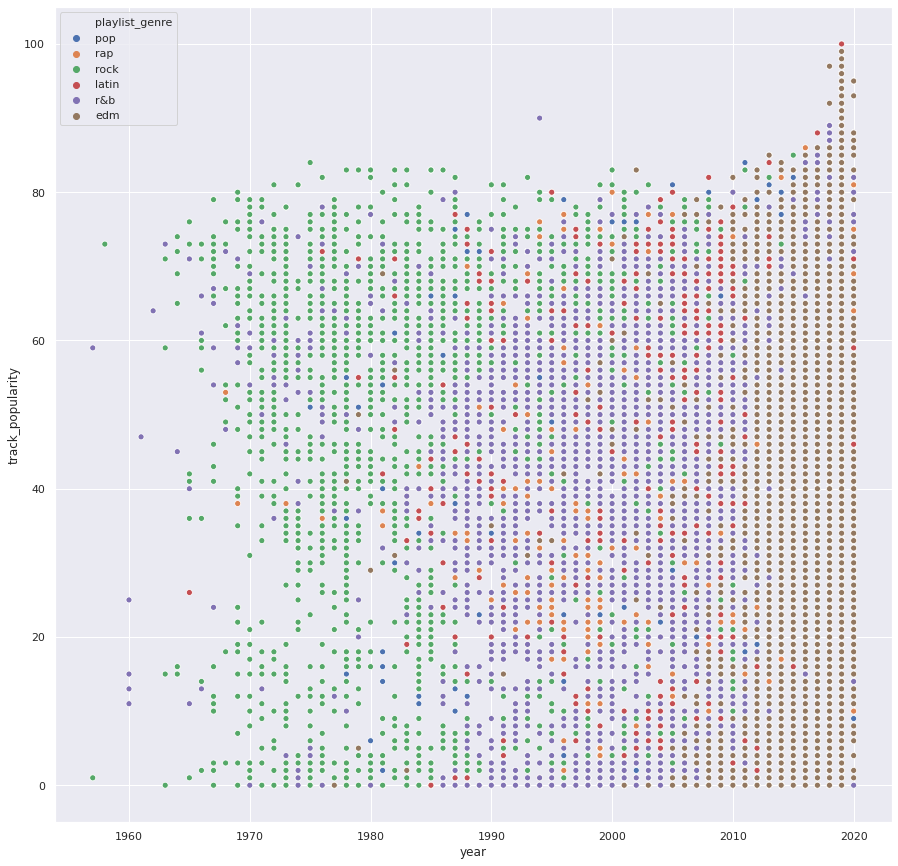

In [49]:
# Investigate trend in genre popularity per year
plt.figure(figsize=(15,15))
sns.scatterplot(x='year', y='track_popularity', hue='playlist_genre', data=spotify_df)

The EDM genre saw its rise from the 2010's with majority of tracks produced after 2010 falling in its category. With pop and r&b tracks dominating the 90's and early 2000's

In [50]:
genre_trends = spotify_df[['year', 'playlist_genre','track_popularity']]
pivot_genre = genre_trends.groupby(['playlist_genre','year']).mean().unstack()

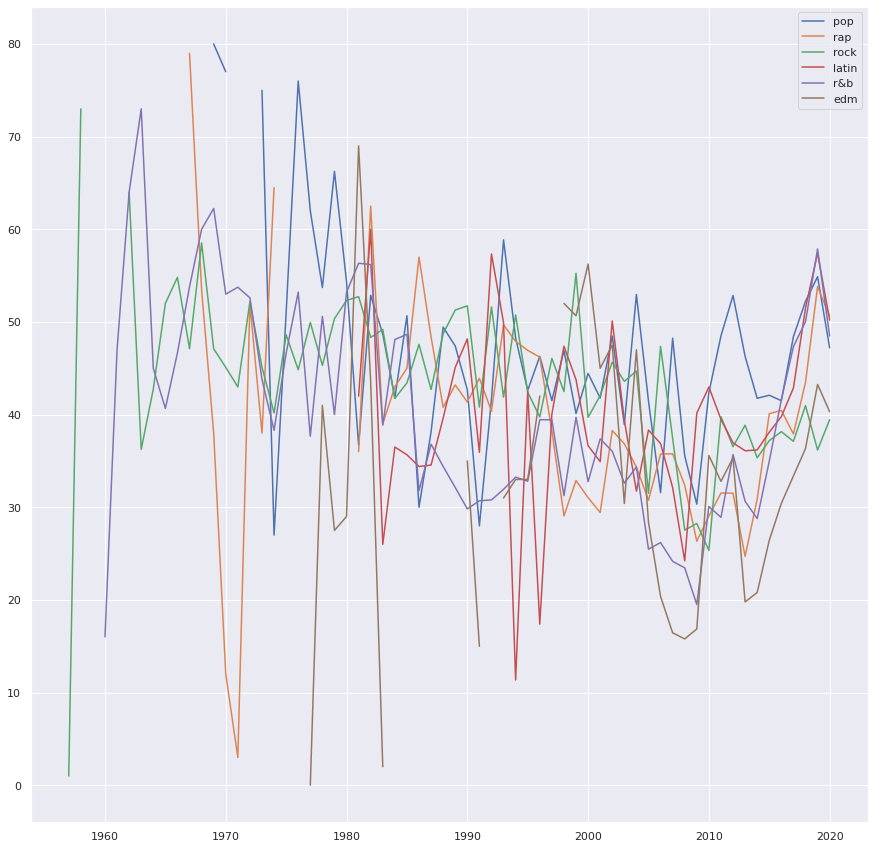

In [51]:
# Plot average popularity of genres over the years
years = spotify_df.year.sort_values(ascending=True).unique()
genres = spotify_df.playlist_genre.unique()

plt.figure(figsize=(15,15))
for genre in genres:
  plt.plot(years, pivot_genre.loc[genre].values)

plt.legend(genres)

In [52]:
# Visualize most popular genre by year
pivot_genre.style.highlight_max(color='lightgreen').highlight_min(color='red')

In [53]:
# Get most popular genre per year
df = genre_trends.groupby(['year', 'playlist_genre'])['track_popularity'].mean()
max_average = df.groupby(level=0).max()
popular_genres = dict(df[df.isin(max_average)].groupby(level=0).head(1).index.to_list())


In [54]:
# Create pop_genre variable which contains the most popular genre for each tracks, release year
def set_value(row_number, assigned_value): 
    return assigned_value[row_number] 

spotify_df['pop_genre'] = spotify_df['year'].apply(set_value, args=(popular_genres, ))

In [55]:
# Get average popularity of songs in popular genre per year
pop_frame = pd.DataFrame({'year':list(popular_genres.keys()), 'pop_genre_average': max_average.values})

# Merge pop frame to spotify data
spotify_df = pd.merge(spotify_df, pop_frame, on='year')

spotify_df.sample(10)

track_id          track_name  \
28441  6F4kIwgUAFU87bqpga91TR          Tensionado   
30901  5tU9JM1v72X7oM808Am6Fq          Radar Love   
31080  1CHmeKI1Z7UX82uAUSKFnN  We'll Burn The Sky   
13167  7qLqv48Sl8JTFRlqotyvfY          Mondsichel   
1051   4JV1uisNtkANI5qsIv0k7n       Workin' On It   
25302  4Ghq7XXreyLUJmmRBGlbbw             Afroman   
32059  1vXowFMghZPxYLY4dozLzY         Never Alone   
32717  3QcuZo6WLcFkqqLmDs0d95      Doctor My Eyes   
28754  5KjeQtJQDFCMurnXYlpDz4  Still Ridin' Clean   
19599  6Knv6wdA0luoMUuuoYi2i1            My House   

                         track_artist  track_popularity  \
28441                        Soapdish                 1   
30901                  Golden Earring                57   
31080                       Scorpions                 3   
13167                     Celo & Abdi                 0   
1051                   Meghan Trainor                64   
25302                 Plastilina Mosh                43   
32059  The High School of Music & Art                 0   
32717                  Jackson Browne                66   
28754                     Project Pat                35   
19599                        Flo Rida                76   

               track_album_id  \
28441  1dO3EZspn36GkTEuSYJVTK   
30901  4YsXD5Zmj8wjmPzPzUEDZh   
31080  0DQhMtHlEo7HWoyBC53ten   
13167  19BGV72wsXpj1FMKvYX6NF   
1051   2JTk5A2zzjmg06JDGOqJWQ   
25302  6QxPNkckiFeiIB5ijjyWSk   
32059  2nE5WmbSq3qbyDrOpSTlnq   
32717  0n93YRc9GP3ZgREgTHvP5u   
28754  1SVEph4VG00L3vsmMeeBcC   
19599  5lkNnHVlnCCCV304t89wOH   

                                        track_album_name  \
28441                                  Soapdish Reloaded   
30901                                            Moontan   
31080   Taken By Force (50th Anniversary Deluxe Edition)   
13167                                         Mondsichel   
1051                                       Workin' On It   
25302                                           Aquamosh   
32059  Fame: The Original Soundtrack from the Motion ...   
32717             Jackson Browne (Saturate Before Using)   
28754            Layin' Da Smack Down (Explicit Version)   
19599                                           My House   

      track_album_release_date  \
28441               2006-09-12   
30901                     1973   
31080               1977-12-04   
13167               2017-10-13   
1051                2019-10-31   
25302               1998-06-30   
32059               1980-05-16   
32717                     1972   
28754               2002-07-16   
19599               2015-04-07   

                                           playlist_name  \
28441                                 Pinoy Classic Rock   
30901                            Hard Rock Cafe Classics   
31080                                  This Is Scorpions   
13167                                        GANGSTA Rap   
1051   Indie Poptimism (PUBLIC, The Band CAMINO, love...   
25302                   HIP-HOP: Latin Rap ['89-present]   
32059                                             Gospel   
32717      I didn’t know perm stood for permanent (wave)   
28754            Dirty South Rap Classics by DJ HOTSAUCE   
19599  random playlist that can't decide its genre so...   

                  playlist_id playlist_genre   playlist_subgenre  \
28441  37i9dQZF1DWYDQ8wBxd7xt           rock        classic rock   
30901  3sv5ViKoPDNnZRsklzEGMN           rock           hard rock   
31080  37i9dQZF1DWViGKI2U5P2K           rock           hard rock   
13167  5GA8GDo7RQC3JEanT81B3g            rap        gangster rap   
1051   69yb02k0ZOmukYaxJXwp76            pop     indie poptimism   
25302  5fWgI0IJ1el5NB1sZ0Egsx          latin       latin hip hop   
32059  0pItJZBDZFvgAOdFnSITnJ            r&b  urban contemporary   
32717  3e6gYPyrTbaB8BWgSHCt5j           rock      permanent wave   
28754  0tLHH1C4HkWEUCXXSSjbOe            rap    southern hip hop   
19599  49qyKvg6UAQAvIMUIGMnP3            pop  

Song popularity is heavily influenced by the artist hence the artist name feature is important to consider when trying to predict song popularity. To do this, create an artist popularity feature which is based on whether an artist is listed in the following lists:

- [Billboard - Greatest of all time](https://www.billboard.com/charts/greatest-of-all-time-artists)
- [VH1 - Greatest Artists of All time](https://www.stereogum.com/495331/vh1-100-greatest-artists-of-all-time/photo/)
- [Ypulse - The 17 Musicians Gen Z & Millennials Say Represent Their Generations](https://www.ypulse.com/article/2019/10/08/the-17-musicians-gen-z-millennials-say-represent-their-generations/)
- [Rolling Stones - 100 Greatest Artists](https://www.rollingstone.com/music/music-lists/100-greatest-artists-147446/?list_page=2#list-item-10) 

In [56]:
# Read in artist listing

billboard = pd.read_csv('billboard.csv', header=None, names=['Artists'])
rolling_stones = pd.read_csv('rolling_stones.csv', header=None,  names=['Artists'])
vh1 = pd.read_csv('vh1.csv', encoding='utf-8', header=None, names=['Artists'])

In [57]:
billboard.drop(index=0, inplace=True)
rolling_stones.drop(index=0, inplace=True)

In [58]:
# Remove numbers from vh1 listing
vh1['Artists'] = vh1.Artists.str.replace('\d+', '').str.rstrip().str.lstrip()

In [59]:
# Combine the three listings into one.

popular_artists = set(billboard.Artists.values).union(set(rolling_stones.Artists.values))
popular_artists = popular_artists.union(set(vh1.Artists.values))

In [60]:
# Get count of popular artists in spotify data
identified_artists = popular_artists.intersection(set(spotify_df.track_artist.values))
len(identified_artists)

165

In [61]:
# Get the average popularity for each identified artist
avg_popularity = {}

for artist in list(identified_artists):
  avg_popularity[artist] = spotify_df[spotify_df.track_artist == artist].track_popularity.mean()


In [62]:
# Average song popularity of popular artists 
avg_track_popularity = pd.DataFrame(avg_popularity.items(), columns=['Artist','Average_song_popularity'])

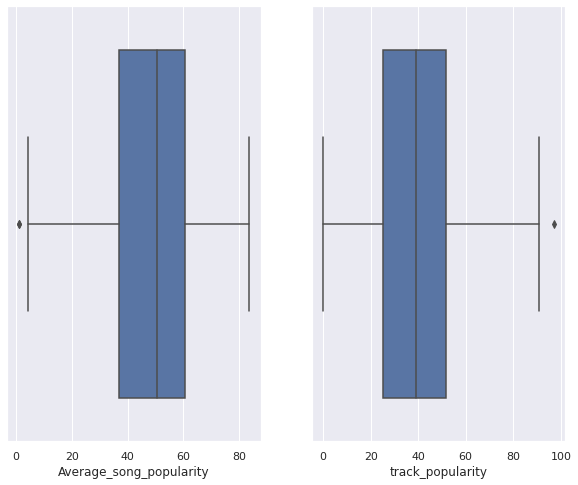

In [63]:
# Plot distribution of average song popularity vs all data
fig, ax = plt.subplots(1,2)
sns.boxplot(avg_track_popularity.Average_song_popularity, ax=ax[0])
sns.boxplot(spotify_df.groupby(['track_artist'])['track_popularity'].mean(), ax=ax[1])
fig.show()

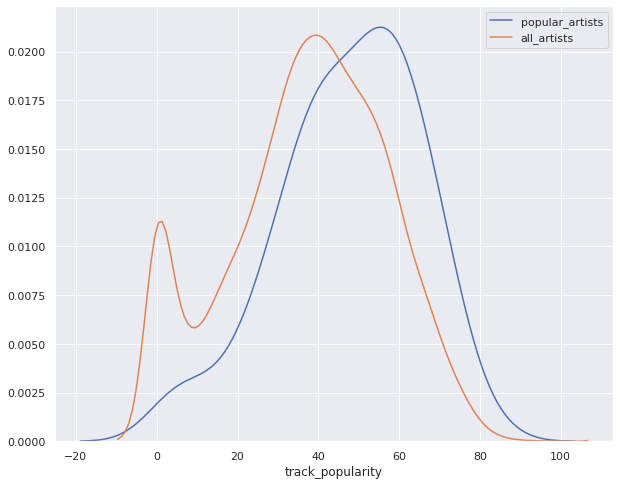

In [64]:
sns.distplot(avg_track_popularity.Average_song_popularity, bins=10, hist=False, label='popular_artists')
sns.distplot(spotify_df.groupby(['track_artist'])['track_popularity'].mean(), bins=10, hist=False, label='all_artists')
plt.legend()

The artists considered popular based on the listings selected indeed have a higher average track popularity. 

In [65]:
# Create artist popularity feature, if artist in popular artists list value is 1, 0 otherwise

spotify_df['artist_popularity'] = np.where(spotify_df['track_artist'].isin(list(identified_artists)), 1, 0)

In [66]:
spotify_df.head()

track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxury...               2019-06-14   
1                    Memories (Dillon Francis Remix)               2019-12-13   
2                    All the Time (Don Diablo Remix)               2019-07-05   
3                        Call You Mine - The Remixes               2019-07-19   
4            Someone You Loved (Future Humans Remix)               2019-03-05   

  playlist_name             playlist_id playlist_genre playlist_subgenre  \
0     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   
1     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   
2     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   
3     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   
4     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.748   0.916    6    -2.634     1       0.0583        0.1020   
1         0.726   0.815   11    -4.969     1       0.0373        0.0724   
2         0.675   0.931    1    -3.432     0       0.0742        0.0794   
3         0.718   0.930    7    -3.778     1       0.1020        0.0287   
4         0.650   0.833    1    -4.672     1       0.0359        0.0803   

   instrumentalness  liveness  valence    tempo  duration_ms  year pop_genre  \
0          0.000000    0.0653    0.518  122.036       194754  2019       r&b   
1          0.004210    0.3570    0.693   99.972       162600  2019       r&b   
2          0.000023    0.1100    0.613  124.008       176616  2019       r&b   
3          0.000009    0.2040    0.277  121.956       169093  2019       r&b   
4          0.000000    0.0833    0.725  123.976       189052  2019       r&b   

   pop_genre_average  artist_popularity  
0          57.874435                  1  
1          57.874435                  1  
2          57.874435                  0  
3          57.874435                  0  
4          57.874435                  0

In [67]:
# Determine average popularity per artists
artist_pop = spotify_df.groupby('track_artist')['track_popularity'].mean().reset_index()
artist_pop.rename(columns={'track_popularity':'average_artist_popularity'}, inplace=True)
spotify_df = pd.merge(spotify_df, artist_pop, on='track_artist')
spotify_df.head()

track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  7fvUMiyapMsRRxr07cU8Ef  Beautiful People (feat. Khalid) - Jack Wins Remix   
2  3eFJI470ALf1EYjywPRsJy  Cross Me (feat. Chance the Rapper & PnB Rock) ...   
3  1EJgymgJHcjSOGSHcYaxvW  South of the Border (feat. Camila Cabello & Ca...   
4  3vQhEd4lOg4mAV6CHCgoHW  South of the Border (feat. Camila Cabello & Ca...   

  track_artist  track_popularity          track_album_id  \
0   Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1   Ed Sheeran                67  2yiy9cd2QktrNvWC2EUi0k   
2   Ed Sheeran                58  49bXZtlI5kQSqQMSCnSaWO   
3   Ed Sheeran                66  1imXAvLuowvPYIsFMYUPY0   
4   Ed Sheeran                65  05Bru0ZVTxp4orAyrZIA77   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxury...               2019-06-14   
1  Beautiful People (feat. Khalid) [Jack Wins Remix]               2019-07-11   
2  Cross Me (feat. Chance the Rapper & PnB Rock) ...               2019-06-21   
3  South of the Border (feat. Camila Cabello & Ca...               2019-12-11   
4  South of the Border (feat. Camila Cabello & Ca...               2019-10-04   

  playlist_name             playlist_id playlist_genre playlist_subgenre  \
0     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   
1     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   
2     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   
3     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   
4     Dance Pop  37i9dQZF1DWZQaaqNMbbXa            pop         dance pop   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.748   0.916    6    -2.634     1       0.0583        0.1020   
1         0.675   0.919    8    -5.385     1       0.1270        0.0799   
2         0.679   0.923    6    -6.500     1       0.1810        0.1460   
3         0.805   0.835    0    -4.603     1       0.0896        0.1300   
4         0.789   0.858    5    -4.388     1       0.0404        0.2200   

   instrumentalness  liveness  valence    tempo  duration_ms  year pop_genre  \
0          0.000000    0.0653    0.518  122.036       194754  2019       r&b   
1          0.000000    0.1430    0.585  124.982       163049  2019       r&b   
2          0.000005    0.1240    0.752  121.984       207894  2019       r&b   
3          0.000005    0.3650    0.722  125.028       188230  2019       r&b   
4          0.000046    0.3350    0.491  110.012       173455  2019       r&b   

   pop_genre_average  artist_popularity  average_artist_popularity  
0          57.874435                  1                  74.231884  
1          57.874435                  1                  74.231884  
2          57.874435                  1                  74.231884  
3          57.874435                  1                  74.231884  
4          57.874435                  1                  74.231884

## Cluster Analysis

#### a) Centroid Clustering

In [68]:
# Encode playlist genre variable

model_df = pd.get_dummies(spotify_df, columns=['playlist_genre'], dtype=np.int64)
obj_var = model_df.select_dtypes(include=['object']).columns.to_list()
model_df.drop(obj_var, axis=1, inplace=True)
model_df.sample(3)

track_popularity  danceability  energy  key  loudness  mode  \
30893                41         0.864   0.869    1    -3.602     1   
9621                  7         0.515   0.801    4    -5.990     0   
28606                55         0.633   0.327    0    -3.599     1   

       speechiness  acousticness  instrumentalness  liveness  valence  \
30893       0.1290        0.2550          0.000134    0.0469   0.9300   
9621        0.0329        0.0153          0.624000    0.0876   0.0615   
28606       0.0386        0.8310          0.000030    0.1140   0.5700   

         tempo  duration_ms  year  pop_genre_average  artist_popularity  \
30893  100.011       220200  2000          56.250000                  0   
9621   150.135       243200  2019          57.874435                  0   
28606  127.853       165015  2020          50.635220                  0   

       average_artist_popularity  playlist_genre_edm  playlist_genre_latin  \
30893                  37.333333                   0                     0   
9621                   26.000000                   0                     0   
28606                  55.000000                   0                     0   

       playlist_genre_pop  playlist_genre_r&b  playlist_genre_rap  \
30893                   0                   1                   0   
9621                    0                   0                   1   
28606                   1                   0                   0   

       playlist_genre_rock  
30893                    0  
9621                     0  
28606                    0

In [69]:
# Get X and Y variables
X = model_df.drop('track_popularity', axis=1)
Y = model_df.track_popularity


In [70]:
X.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'year', 'pop_genre_average', 'artist_popularity',
       'average_artist_popularity', 'playlist_genre_edm',
       'playlist_genre_latin', 'playlist_genre_pop', 'playlist_genre_r&b',
       'playlist_genre_rap', 'playlist_genre_rock'],
      dtype='object')

In [71]:
# Remove binary features from X before scaling
binary_X = X[['artist_popularity', 'playlist_genre_edm',
       'playlist_genre_latin', 'playlist_genre_pop', 'playlist_genre_r&b',
       'playlist_genre_rap', 'playlist_genre_rock']]

In [72]:
# Scale features
from sklearn.preprocessing import StandardScaler

scaled_X = StandardScaler().fit_transform(X.drop(binary_X, axis=1))

In [73]:
scaled_X.dtype

dtype('float64')

In [74]:
arr_binary = binary_X.to_numpy(dtype=np.float64)
scaled_X = np.concatenate((scaled_X,arr_binary), axis=1)

In [75]:
# Perform kmeans clustering with 6 clusters( number of genres)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(scaled_X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

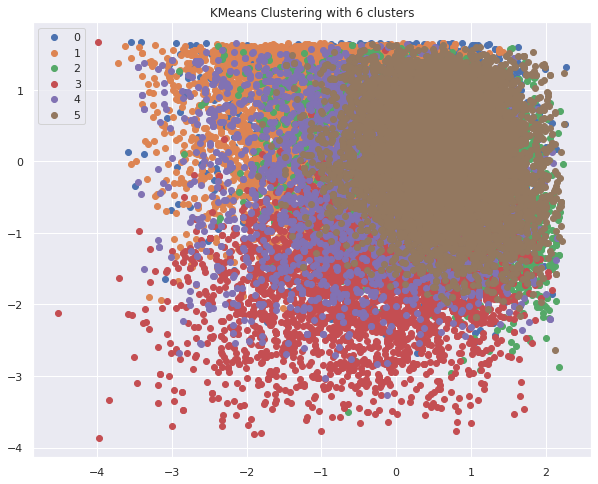

In [76]:
# Get the kmeans scatter plot
predictions = kmeans.labels_
clusters = np.unique(kmeans.labels_)

for clust in clusters:
  row_ix = np.where(predictions == clust)
  plt.scatter(scaled_X[row_ix, 0], scaled_X[row_ix, 1], label=clust)

plt.title('KMeans Clustering with 6 clusters')
plt.legend()
plt.show()


In [77]:
# Lowest SSE value
kmeans.inertia_

379887.3594003263

In [78]:
# Select appropriate number of clusters with elbow method
SSE = []
for k in  __builtin__.range(1, 15):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(scaled_X)
  SSE.append(kmeans.inertia_)

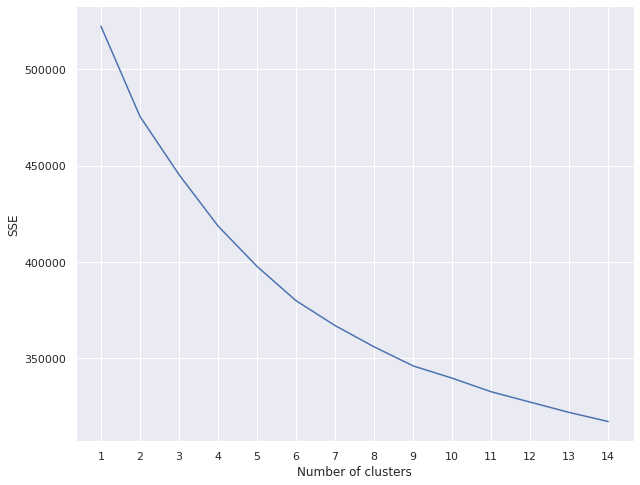

In [79]:
plt.plot(__builtin__.range(1, 15), SSE)
plt.xticks(__builtin__.range(1,15))
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [80]:
# Determine appropriate number of clusters using Knee locator
!pip install kneed
from kneed import KneeLocator

In [81]:
appropriate_k = KneeLocator(__builtin__.range(1,15), SSE, curve='convex', direction='decreasing')
appropriate_k.elbow

6

The appropriate number of clusters according to the elbow method is 6.

In [82]:
# Determine appropiate  number of clusters using silhoutte method
from sklearn.metrics import silhouette_score
silhouette_coefficients = []

for k in __builtin__.range(2, 15):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(scaled_X)
  score = silhouette_score(scaled_X, kmeans.labels_)
  silhouette_coefficients.append(score)


Text(0, 0.5, 'Silhouette coefficients')

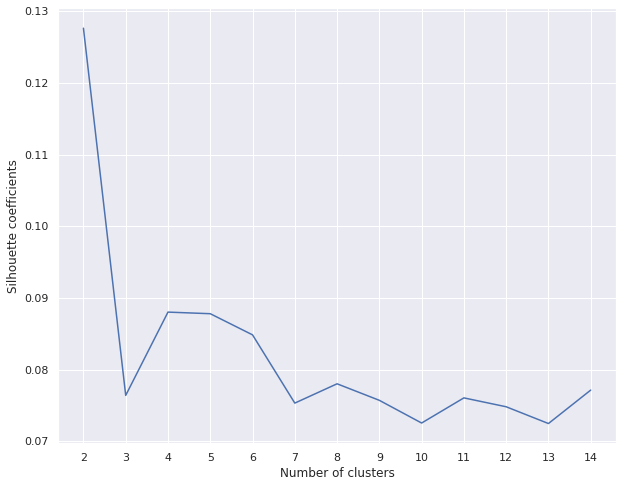

In [83]:
plt.plot(__builtin__.range(2,15), silhouette_coefficients)
plt.xticks(__builtin__.range(2,15))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette coefficients')

In [84]:
# Perform clustering with all features being scaled
scaled_X2 = StandardScaler().fit_transform(X)

In [85]:
# Perform kmeans clustering with 6 clusters( number of genres)
from sklearn.cluster import KMeans
kmeans2 = KMeans(n_clusters=6, random_state=42)
kmeans2.fit(scaled_X2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

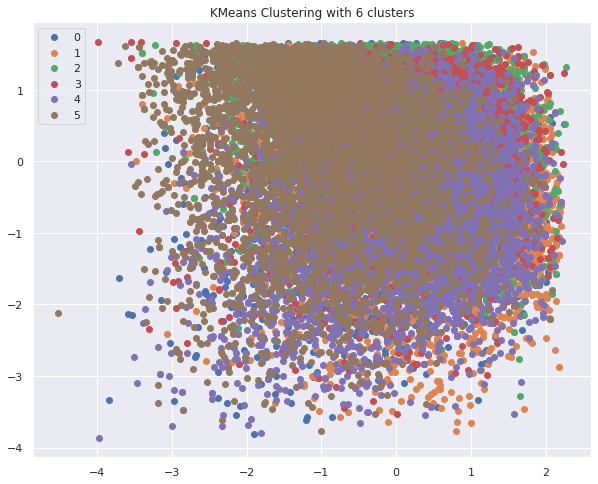

In [86]:
# Get the kmeans scatter plot
predictions = kmeans2.labels_
clusters = np.unique(kmeans2.labels_)

for clust in clusters:
  row_ix = np.where(predictions == clust)
  plt.scatter(scaled_X[row_ix, 0], scaled_X[row_ix, 1], label=clust)

plt.title('KMeans Clustering with 6 clusters')
plt.legend()
plt.show()

In [87]:
# Determine appropiate  number of clusters using silhoutte method
from sklearn.metrics import silhouette_score
silhouette_coefficients = []

for k in __builtin__.range(2, 15):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(scaled_X2)
  score = silhouette_score(scaled_X2, kmeans.labels_)
  silhouette_coefficients.append(score)


Text(0, 0.5, 'Silhouette coefficients')

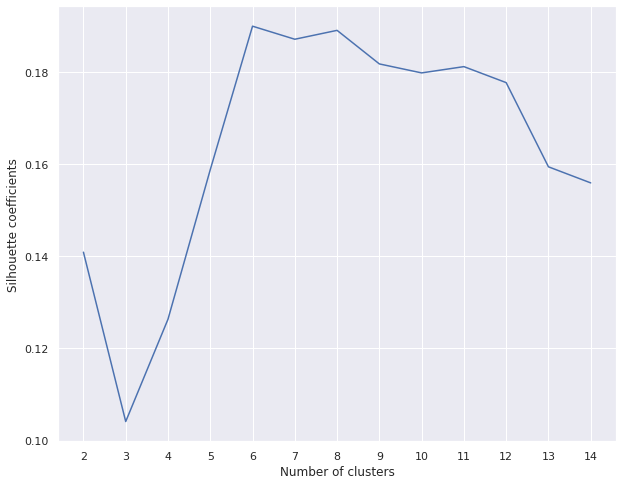

In [88]:
plt.plot(__builtin__.range(2,15), silhouette_coefficients)
plt.xticks(__builtin__.range(2,15))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette coefficients')

With all features scaled, the silhouette method gives the appropriate number of clusters as k = 6 and k = 8. 2 new genres emerge

### Density Based Clustering

In [89]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=3, min_samples=15)
dbscan.fit(scaled_X)

DBSCAN(algorithm='auto', eps=3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=15, n_jobs=None, p=None)

In [90]:
np.unique(dbscan.labels_)

array([-1,  0])

In [91]:
labels = dbscan.labels_

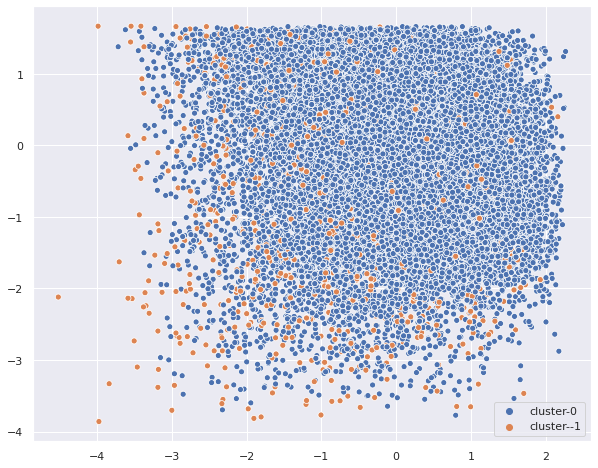

In [92]:
sns.scatterplot(scaled_X[:,0], scaled_X[:,1], hue=["cluster-{}".format(x) for x in labels])

With the binary features not scaled, dbscan identifies two clusters as well.

In [93]:
# Determine the optimal epsilon value
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(scaled_X)
distances, indices = nbrs.kneighbors(scaled_X)

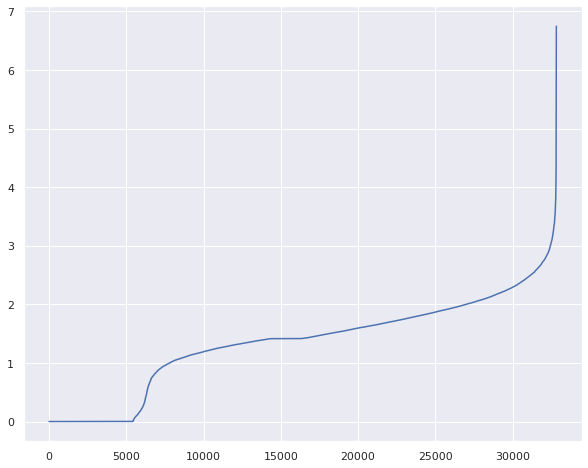

In [94]:
# Sort and plot distances
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [95]:
db = DBSCAN(eps=2.9, min_samples=5)
db.fit(scaled_X)
labels = db.labels_

silhouette_score(scaled_X, labels)

0.16625464638881737

Despite selecting the most optimal epsilon, density based clustering has a silhouette score of 0.1666 which is less than the Kmeans' silhouette score.

The 6 clusters identified by the Kmeans clustering are to be expected. However, the additional 2 clusters are quite an interesting discovery.

In [96]:
# Create cluster label variable based on clusters identified when k is 8
labels = KMeans(n_clusters=8, random_state=42).fit(scaled_X2).labels_

model_df['cluster_label'] = labels

In [97]:
model_df.groupby(['cluster_label']).describe()

track_popularity                                                \
                         count       mean        std  min    25%   50%   75%   
cluster_label                                                                  
0                       4805.0  40.714672  26.026278  0.0  19.00  43.0  61.0   
1                       3080.0  39.215260  24.071091  0.0  19.00  43.0  59.0   
2                       5931.0  34.615916  23.116922  0.0  16.00  36.0  51.0   
3                       5078.0  47.937771  25.243733  0.0  30.25  53.0  68.0   
4                       4926.0  46.994722  25.576321  0.0  32.00  50.0  67.0   
5                       1826.0  45.049288  22.398674  0.0  33.00  49.0  60.0   
6                       1852.0  46.667927  25.459990  0.0  25.00  54.0  68.0   
7                       5330.0  43.023077  23.699058  0.0  28.00  47.0  61.0   

                     danceability                                              \
                 max        count      mean       std    min      25%     50%   
cluster_label                                                                   
0               99.0       4805.0  0.686362  0.128246  0.140  0.60800  0.7010   
1               88.0       3080.0  0.510517  0.135641  0.116  0.42000  0.5130   
2               99.0       5931.0  0.654999  0.123012  0.162  0.57600  0.6580   
3              100.0       5078.0  0.644410  0.123882  0.199  0.57000  0.6550   
4              100.0       4926.0  0.719602  0.107586  0.140  0.66200  0.7310   
5               98.0       1826.0  0.580506  0.156868  0.000  0.47525  0.5905   
6               95.0       1852.0  0.541927  0.145604  0.155  0.44575  0.5430   
7               98.0       5330.0  0.724492  0.134844  0.150  0.64100  0.7450   

                               energy                                       \
                   75%    max   count      mean       std       min    25%   
cluster_label                                                                
0              0.77900  0.977  4805.0  0.624080  0.154229  0.058600  0.510   
1              0.60100  0.917  3080.0  0.794028  0.153463  0.216000  0.698   
2              0.74100  0.983  5931.0  0.809480  0.130070  0.199000  0.728   
3              0.73175  0.979  5078.0  0.727777  0.142553  0.257000  0.631   
4              0.79400  0.979  4926.0  0.723641  0.132932  0.231000  0.635   
5              0.70100  0.956  1826.0  0.334066  0.130478  0.000175  0.248   
6              0.64600  0.952  1852.0  0.657173  0.196063  0.045500  0.512   
7              0.82500  0.975  5330.0  0.675609  0.144459  0.164000  0.573   

                                        key                                \
                  50%    75%    max   count      mean       std  min  25%   
cluster_label                                                               
0              0.6230  0.733  0.995  4805.0  5.438710  3.598941  0.0  2.0   
1              0.8330  0.918  0.997  3080.0  5.331169  3.527842  0.0  2.0   
2              0.8330  0.915  0.998  5931.0  5.355926  3.558275  0.0  2.0   
3              0.7420  0.837  0.999  5078.0  5.311343  3.642341  0.0  2.0   
4              0.7380  0.824  0.997  4926.0  5.499797  3.640034  0.0  2.0   
5              0.3300  0.415  1.000  1826.0  5.269989  3.592069  0.0  2.0   
6              0.6765  0.824  0.998  1852.0  4.999460  3.548613  0.0  2.0   
7              0.6800  0.783  0.999  5330.0  5.469418  3.691813  0.0  2.0   

                              loudness                                         \
               50%  75%   max    count       mean       std     min       25%   
cluster_label                                                                   
0              6.0  9.0  11.0   4805.0  -7.408765  2.476238 -20.734  -8.82900   
1              6.0  9.0  11.0   3080.0  -6.290074  2.555871 -16.064  -7.80050   
2              6.0  8.0  11.0   5931.0  -5.310850  2.196650 -16.401  -6.42500   
3              5.0  9.0  11.0   5078.0  -5.92167

In [98]:
# Identify songs in cluster five
spotify_df[spotify_df.index.isin(model_df[model_df.cluster_label == 5].index)]

track_id  \
26     5ug4vqGZ3eisGhY1IsziNX   
51     1bhUWB0zJMIKr9yVPrkEuI   
57     1HNkqx9Ahdgi1Ixy2xkKkL   
59     1HNkqx9Ahdgi1Ixy2xkKkL   
61     5pY3ovFxbvAg7reGZjJQSp   
63     1HNkqx9Ahdgi1Ixy2xkKkL   
66     3FSPaBp49Clqq2p4zc9dbA   
68     6Qm7DBWQguBzK459j4fOBt   
70     2b8fOow8UzyDFAE27YhOZM   
71     2b8fOow8UzyDFAE27YhOZM   
72     2b8fOow8UzyDFAE27YhOZM   
73     2b8fOow8UzyDFAE27YhOZM   
74     2b8fOow8UzyDFAE27YhOZM   
75     2b8fOow8UzyDFAE27YhOZM   
76     2b8fOow8UzyDFAE27YhOZM   
78     2b8fOow8UzyDFAE27YhOZM   
294    7qEHsqek33rTcFNT9PFqLf   
296    7qEHsqek33rTcFNT9PFqLf   
297    4Of7rzpRpV1mWRbhp5rAqG   
306    1NxHgM5nOnmqi3KUVLbaIw   
307    7qEHsqek33rTcFNT9PFqLf   
310    7qEHsqek33rTcFNT9PFqLf   
387    3YlskN374K4nvbcujk7wSG   
755    7DNGqrLnd07C2FPpAdn6cc   
756    3VlbOrM6nYPprVvzBZllE5   
759    5Db9VIdDsN5yu3Eu7CT0i4   
760    4qjDMhpqlSQABkLD9lmAxi   
762    64GRDrL1efgXclrhVCeuA0   
864    2FYWU01SATdqHwAVh84oNN   
1047   3707IBa4HnS3zDDoWfeUBl   
1048   3707IBa4HnS3zDDoWfeUBl   
1065   4qE36yuwYbHnsPzlwhrO3M   
1074   0iHO8dmXhSYCgfow7ckt9W   
1076   15xWRPHQMeqgdkGzInx3PY   
1090   5uCax9HTNlzGybIStD3vDh   
1267   3ZCTVFBt2Brf31RLEnCkWJ   
1269   3ZCTVFBt2Brf31RLEnCkWJ   
1271   3ZCTVFBt2Brf31RLEnCkWJ   
1272   4SSnFejRGlZikf02HLewEF   
1276   3ZCTVFBt2Brf31RLEnCkWJ   
1278   3ZCTVFBt2Brf31RLEnCkWJ   
1281   3ZCTVFBt2Brf31RLEnCkWJ   
1282   6X29iaaazwho3ab7GNue5r   
1283   6CcJMwBtXByIz4zQLzFkKc   
1284   3LgWsmilsrWXiPYQFRD0T7   
1285   4QIo4oxwzzafcBWkKjDpXY   
1287   7qEKqBCD2vE5vIBsrUitpD   
1288   0tMSssfxAL2oV8Vri0mFHE   
1290   3ZCTVFBt2Brf31RLEnCkWJ   
1292   4NzMOnvSJVNKF7nw5NkXIP   
1294   3ZCTVFBt2Brf31RLEnCkWJ   
1295   2Fxmhks0bxGSBdJ92vM42m   
1297   0u2P5u6lvoDfwTYjAADbn4   
1298   14JzyD6FlBD5z0wV5P07YI   
1301   3WxmlTZ85sCYFnuIXmUAEe   
1302   7hDVYcQq6MxkdJGweuCtl9   
1303   1WsEgieHsWWndAzLkmV105   
1305   41zXlQxzTi6cGAjpOXyLYH   
1307   04sN26COy28wTXYj3dMoiZ   
1373   6L8ioSFZVWeJK2jkOCkflj   
1430   1ppOGANOzMT01Cxh9jx4hN   
1431   1ppOGANOzMT01Cxh9jx4hN   
1434   1ppOGANOzMT01Cxh9jx4hN   
1577   0XUHYxHOOctkSXReILAaJV   
1747   5pd5gGxcHxErpWzbYxNi15   
1935   51Wao8QZ4Fv4zamKbRnKQd   
1936   6SseDBcadnkZaEAkzUK6a7   
2211   5nMkd5cq4JPZqAoQTXv8Wm   
2590   3VTSI0kKvOu7pg0khK6ySn   
2701   7sJwGtoWgkVRwzujlyT3cp   
2716   3u5bTqHMM1P34ZkbwzdckV   
3174   4wTMUy64bGyYPDx46tJuBB   
3323   4VPlKUSjC9HdZdUbFZ0Y5y   
3363   26fhQbuzry0XWjNmmaKdcr   
3568   0FHNqVPxu14WivXR4Y2hFr   
3650   3vgiIJW3iSQRRvgYiW86i9   
3785   26Fqtv4Aa7kyd1WWGHai6A   
3813   5dikapPlQPrsT3xUsUjj0N   
3978   1vtQLXxSIr0A4Pfs9VGqxk   
4021   3IPJg1sdqLj12kFIndaonN   
4029   5o3pP3SWueoHRCytmwaL52   
4030   1HfMVBKM75vxSfsQ5VefZ5   
4031   1HfMVBKM75vxSfsQ5VefZ5   
4034   1HfMVBKM75vxSfsQ5VefZ5   
4036   1HfMVBKM75vxSfsQ5VefZ5   
4038   1HfMVBKM75vxSfsQ5VefZ5   
4039   1HfMVBKM75vxSfsQ5VefZ5   
4041   1HfMVBKM75vxSfsQ5VefZ5   
4069   4l0Mvzj72xxOpRrp6h8nHi   
4075   4l0Mvzj72xxOpRrp6h8nHi   
4079   4l0Mvzj72xxOpRrp6h8nHi   
4087   5O3uMYHZpppwOrAglPoydO   
4105   7zH4rnKKGm5vACoSEXBEDe   
4108   6JFyoWiWW69dTjPrJ0RxQ1   
4145   5fmBkJa4mTezkJq8B1TgSn   
4242   1L5VP9PWCU5dRzl1bvlFkJ   
4248   6kckNpuM5oXZrObLExRg6d   
4329   4TwbiHzsLKYydj4CxrufQB   
4331   62tXupybKJWVLgWY9TeBxP   
4393   3zksbXteOCeSusJ5Xltr3t   
4398   5sn1BmEOPP1bu4cZq9OgoF   
4402   4zMmqb0pYwX6b0qc0slCoT   
4403   4zMmqb0pYwX6b0qc0slCoT   
4408   1DXvEWgI1xoxmKv2Zd3pNE   
4409   0mYslGmbnkbxuyr0ISIYtB   
4410   0mYslGmbnkbxuyr0ISIYtB   
4411   6OpU3cvY19M2hFxTbLKy5L   
4454   6ZpX80KeWliOS2xBiQiaN4   
4455   3i1vXYRRXvQlluChlosjgr   
4478   1ZMiCix7XSAbfAJlEZWMCp   
4483   4u9Y4Z9i9VaAbBK7rW1Rha   
4492   7MxPKKqDRIJja7kMMfksFx   
4505   329ZotUK1Kbj9Fj8aASXud   
4506   329ZotUK1Kbj9Fj8aASXud   
4508   6xPVnZ5WcK9sh9FyYIkiW3   
4512   0aHWQ6E8E4YejHS1P3D8t6   
4549   7sTtHHrD0zDpmzQzH3zegz   
4556   4V6MRo0CEAC9MwAm7dkPuL   
4559   7iTwzSe2fg5xYwCgXXFkEe   
4569   4L2K7JKseFCBoHMZEAszW0   
4571   1hSC6vWh3Rzkn9JSWicer

The same songs seems to be appearing more than once in the dataset. This duplication is occuring when the same song appears in multiple playlists. This means that the same song can be placed in multiple playlists, each with different playlist_genres. A pop song can be found in a latin playlist. This deems the playlist_genre and playlist_subgenre meaningless in our cluster analyis.

In [99]:
spotify_df.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'year', 'pop_genre', 'pop_genre_average',
       'artist_popularity', 'average_artist_popularity'],
      dtype='object')

In [100]:
# Create dataframe with only song metadata
unique_tracks = spotify_df[['track_name', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms' ]]

In [101]:
# Drop all duplicated tracks
unique_tracks.drop_duplicates(subset=['track_name'], inplace=True)

In [102]:
unique_tracks.shape

(23449, 13)

In [103]:
# Scale meta features
scaled_meta = StandardScaler().fit_transform(unique_tracks.drop('track_name', axis=1))

In [104]:
# Perform k means clustering with 6 clusters
kmeans3 = KMeans(n_clusters=6, random_state=42)
kmeans3.fit(scaled_meta)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

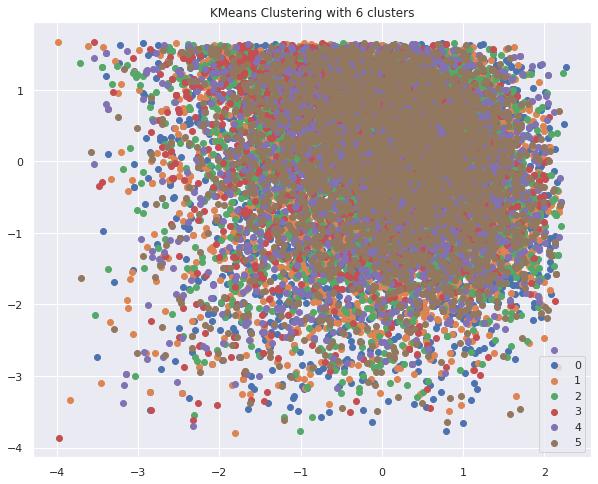

In [105]:
predictions = kmeans3.labels_
clusters = np.unique(kmeans3.labels_)

for clust in clusters:
  row_ix = np.where(predictions == clust)
  plt.scatter(scaled_X[row_ix, 0], scaled_X[row_ix, 1], label=clust)

plt.title('KMeans Clustering with 6 clusters')
plt.legend()

In [106]:
# Determine appropiate  number of clusters using silhoutte method
from sklearn.metrics import silhouette_score
silhouette_coefficients = []

for k in __builtin__.range(2, 15):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(scaled_meta)
  score = silhouette_score(scaled_meta, kmeans.labels_)
  silhouette_coefficients.append(score)

Text(0, 0.5, 'Silhouette coefficients')

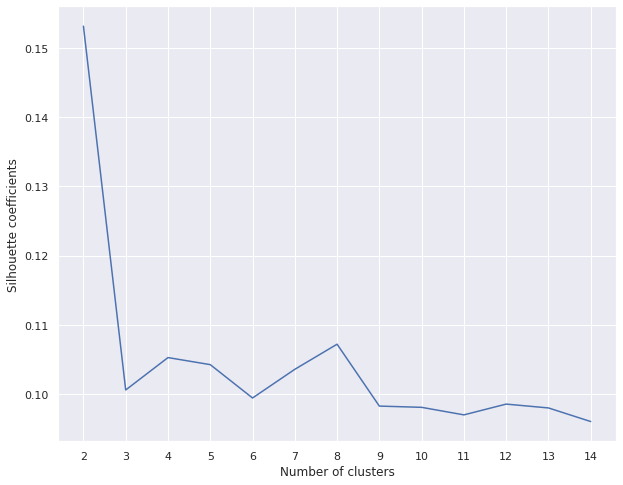

In [107]:
plt.plot(__builtin__.range(2,15), silhouette_coefficients)
plt.xticks(__builtin__.range(2,15))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette coefficients')

Silhoutte coefficient is highest at k = 8

In [108]:
# Select appropriate number of clusters with elbow method
SSE = []
for k in  __builtin__.range(1, 15):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(scaled_meta)
  SSE.append(kmeans.inertia_)

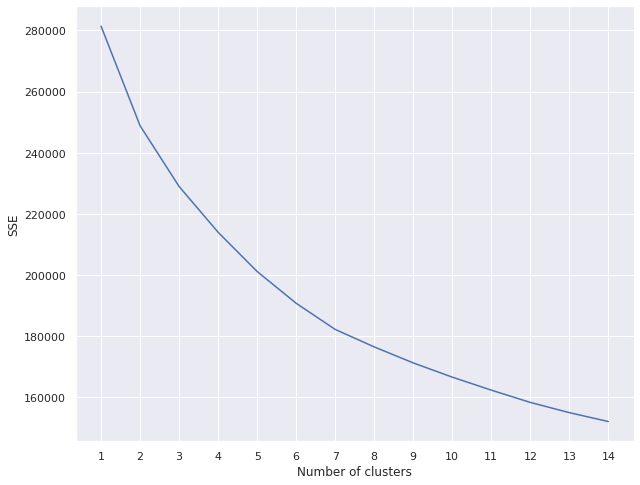

In [109]:
plt.plot(__builtin__.range(1, 15), SSE)
plt.xticks(__builtin__.range(1,15))
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [110]:
appropriate_k = KneeLocator(__builtin__.range(1,15), SSE, curve='convex', direction='decreasing')
appropriate_k.elbow

6

According to the elbow method the approprate number of clusters is 6

In [111]:
# Create frequency variable to identify number of times song appears in data
song_frequency = spotify_df.groupby(['track_name'])['track_id'].count().reset_index()
song_frequency.rename(columns={'track_id': 'song_frequency'}, inplace=True)

merged_df = pd.merge(spotify_df, song_frequency, on='track_name')


In [112]:
# Get average popularity of track
track_popularity_average = spotify_df.groupby(['track_name'])['track_popularity'].mean().reset_index()
track_popularity_average.rename(columns={'track_popularity': 'average_track_popularity'}, inplace=True)
merged_df = pd.merge(merged_df, track_popularity_average, on='track_name')

## Regression Analysis

In [113]:
#Get X and Y variables
X = merged_df.drop('track_popularity', axis=1)
Y = merged_df.track_popularity

In [114]:
# Encode playlist genre and playlist subgenre
X = pd.get_dummies(X, columns=['playlist_genre','playlist_subgenre'], dtype=np.int64)

In [115]:
# Drop object variables
obj_var = X.select_dtypes(include=['object']).columns.to_list()
X.drop(obj_var, axis='columns', inplace=True)

In [116]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(X, Y, test_size=0.3, random_state=42)

In [117]:
# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)

In [118]:
#Transform features
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [119]:
# Load regressors
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn import metrics

In [120]:
# Instantiate regressors
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)

# Evaluate model
print('Logistic Regression Performance: ')
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, logreg_pred)))
print('R2: ', metrics.r2_score(y_test, logreg_pred))


Logistic Regression Performance: 
RMSE:  13.497080606259534
R2:  0.7093466492359051


In [121]:
randforest = RandomForestRegressor(random_state=42)
randforest.fit(x_train, y_train)
randforest_pred = randforest.predict(x_test)

# Evaluate model
print('Random Forest Performance: ')
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, randforest_pred)))
print('R2: ', metrics.r2_score(y_test, randforest_pred))


Random Forest Performance: 
RMSE:  10.960338808918983
R2:  0.8083346486108387


In [122]:
svr = SVR()
svr.fit(x_train, y_train)
svr_pred = svr.predict(x_test)

# Evaluate model
print('Support Vector Regressor Performance: ')
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, svr_pred)))
print('R2: ', metrics.r2_score(y_test, svr_pred))


Support Vector Regressor Performance: 
RMSE:  10.824398673583417
R2:  0.8130595818844871


In [123]:
xgb = XGBRegressor(objective='reg:squarederror')
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)

# Evaluate model
print('XGBoost: ')
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, xgb_pred)))
print('R2: ', metrics.r2_score(y_test, xgb_pred))

XGBoost: 
RMSE:  10.043857716487041
R2:  0.8390478603385847


In [124]:
print('10% of the mean of the target variable:', Y.mean()*0.1)

10% of the mean of the target variable: 4.24835506275131


The RMSE scores of the selected models are greater than 10% of the mean of the target variable, thus the accuracy score is not that great. Among the selected models, XGBoost and Support Vector Regressor have the best R2 scores.

### Feature Selection

In [125]:
# Eliminate playlist subgenre data 
X1 = merged_df.drop('track_popularity', axis=1)
X1 = pd.get_dummies(X1, columns=['playlist_genre'], dtype=np.int64)
X1 = X1.drop(X1.select_dtypes(include=['object']).columns.to_list(), axis=1)

In [126]:
Y1 = merged_df.track_popularity

In [127]:
# Scale and transform features
x_train, x_test, y_train, y_test = tts(X1, Y1, test_size=0.3, random_state=0)

sc = StandardScaler().fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [128]:
# Load regressors

randforest_2 = RandomForestRegressor()
svr_2 = SVR()
xgb_2 = XGBRegressor(objective='reg:squarederror')

#Fit models
randforest_2.fit(x_train, y_train)
svr_2.fit(x_train, y_train)
xgb_2.fit(x_train, y_train)

#Predict y
randforest_2_pred = randforest_2.predict(x_test)
svr_2_pred = svr_2.predict(x_test)
xgb_2_pred = xgb_2.predict(x_test)

# Evaluate performance
# Evaluate model
print('Random Forest Performance: ')
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, randforest_2_pred)))
print('R2: ', metrics.r2_score(y_test, randforest_2_pred))

print('Support Vector Regressor Performance: ')
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, svr_2_pred)))
print('R2: ', metrics.r2_score(y_test, svr_2_pred))

print('XGBoost: ')
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, xgb_2_pred)))
print('R2: ', metrics.r2_score(y_test, xgb_2_pred))

Random Forest Performance: 
RMSE:  10.741041495542609
R2:  0.8146738192545651
Support Vector Regressor Performance: 
RMSE:  10.617249155356207
R2:  0.8189210343139566
XGBoost: 
RMSE:  9.858751117143383
R2:  0.8438694846940401


With removal of playlist subgenre there is a slight improvement in model performance. 

In [129]:
# Eliminate playlist genre variable 
X1 = merged_df.drop('track_popularity', axis=1)
X1 = X1.drop(X1.select_dtypes(include=['object']).columns.to_list(), axis=1)

In [130]:
X1.sample()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
31570         0.806   0.841    7    -5.358     1       0.0971        0.0353   

       instrumentalness  liveness  valence    tempo  duration_ms  year  \
31570             0.088      0.25    0.621  115.128       238533  2001   

       pop_genre_average  artist_popularity  average_artist_popularity  \
31570               45.0                  0                       20.0   

       song_frequency  average_track_popularity  
31570               1                       0.0

In [131]:
Y1 = merged_df.track_popularity

In [132]:
# Scale and transform features
x_train, x_test, y_train, y_test = tts(X1, Y1, test_size=0.3, random_state=0)

sc = StandardScaler().fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [133]:
# Load regressors

randforest_2 = RandomForestRegressor()
svr_2 = SVR()
xgb_2 = XGBRegressor(objective='reg:squarederror')

#Fit models
randforest_2.fit(x_train, y_train)
svr_2.fit(x_train, y_train)
xgb_2.fit(x_train, y_train)

#Predict y
randforest_2_pred = randforest_2.predict(x_test)
svr_2_pred = svr_2.predict(x_test)
xgb_2_pred = xgb_2.predict(x_test)

# Evaluate performance
# Evaluate model
print('Random Forest Performance: ')
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, randforest_2_pred)))
print('R2: ', metrics.r2_score(y_test, randforest_2_pred))

print('Support Vector Regressor Performance: ')
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, svr_2_pred)))
print('R2: ', metrics.r2_score(y_test, svr_2_pred))

print('XGBoost: ')
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, xgb_2_pred)))
print('R2: ', metrics.r2_score(y_test, xgb_2_pred))

Random Forest Performance: 
RMSE:  10.733172154300576
R2:  0.8149452753730546
Support Vector Regressor Performance: 
RMSE:  10.603420964423607
R2:  0.8193924113796843
XGBoost: 
RMSE:  9.854797895778656
R2:  0.8439946718974634


Miniscule improvement in model performance

In [134]:
# Remove binary field before scaling
X2 = merged_df.drop(['track_popularity','artist_popularity','mode'] , axis=1)
Y2 = merged_df.track_popularity
binary_var = merged_df[['artist_popularity','mode']]

In [135]:
obj_var = X2.select_dtypes(include=['object']).columns.to_list()
X2.drop(obj_var, axis='columns', inplace=True)

In [136]:
#Scale Features
X2 = StandardScaler().fit_transform(X2)

In [137]:
X2 = np.concatenate((X1, binary_var), axis=1)

In [138]:
# Scale and transform features
x_train, x_test, y_train, y_test = tts(X2, Y2, test_size=0.3, random_state=0)

In [139]:
# Load regressors

randforest_2 = RandomForestRegressor()
svr_2 = SVR()
xgb_2 = XGBRegressor(objective='reg:squarederror')

#Fit models
randforest_2.fit(x_train, y_train)
svr_2.fit(x_train, y_train)
xgb_2.fit(x_train, y_train)

#Predict y
randforest_2_pred = randforest_2.predict(x_test)
svr_2_pred = svr_2.predict(x_test)
xgb_2_pred = xgb_2.predict(x_test)

# Evaluate performance
# Evaluate model
print('Random Forest Performance: ')
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, randforest_2_pred)))
print('R2: ', metrics.r2_score(y_test, randforest_2_pred))

print('Support Vector Regressor Performance: ')
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, svr_2_pred)))
print('R2: ', metrics.r2_score(y_test, svr_2_pred))

print('XGBoost: ')
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, xgb_2_pred)))
print('R2: ', metrics.r2_score(y_test, xgb_2_pred))

Random Forest Performance: 
RMSE:  10.748527357664955
R2:  0.8144154067572456
Support Vector Regressor Performance: 
RMSE:  24.719284063880494
R2:  0.018442459897463848
XGBoost: 
RMSE:  9.854797895778656
R2:  0.8439946718974634


Slight improvement in the support vector regressor however the XGBoost Regressor still performs best.

#### Principle Component Analysis

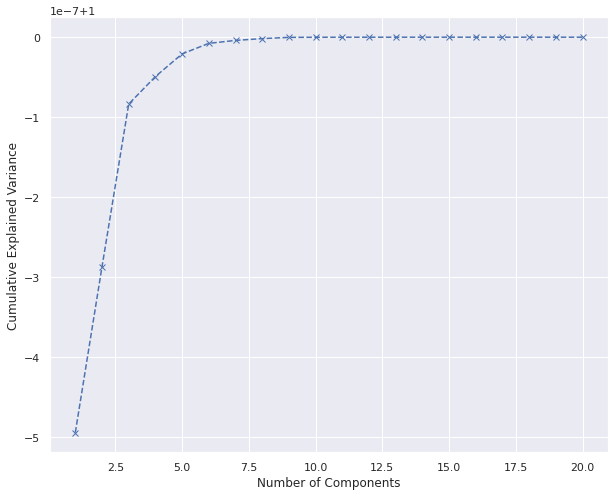

In [140]:
from sklearn.decomposition import PCA
pca = PCA(random_state=0)
pca.fit(x_train)

# getting the explained variance ratio
evr = pca.explained_variance_ratio_
range_length = len(evr) + 1

# plotting the explained variance ratio so we can determine how any principal components to keep
plt.figure(figsize = (10, 8))
plt.plot(__builtin__.range(1, range_length), evr.cumsum(), marker = 'x', linestyle = '--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

10 components explain for at least 80% of the variance in the dataset.

In [141]:
# fitting PCA with 10 components onto our features and transforming them
pca = PCA(n_components=10).fit(x_train)
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

In [142]:
# Load regressors

randforest_2 = RandomForestRegressor()
svr_2 = SVR()
xgb_2 = XGBRegressor(objective='reg:squarederror')

#Fit models with PCA transformed data
randforest_2.fit(x_train, y_train)
svr_2.fit(x_train, y_train)
xgb_2.fit(x_train, y_train)

#Predict y
randforest_2_pred = randforest_2.predict(x_test)
svr_2_pred = svr_2.predict(x_test)
xgb_2_pred = xgb_2.predict(x_test)

# Evaluate performance
# Evaluate model
print('Random Forest Performance: ')
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, randforest_2_pred)))
print('R2: ', metrics.r2_score(y_test, randforest_2_pred))

print('Support Vector Regressor Performance: ')
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, svr_2_pred)))
print('R2: ', metrics.r2_score(y_test, svr_2_pred))

print('XGBoost: ')
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, xgb_2_pred)))
print('R2: ', metrics.r2_score(y_test, xgb_2_pred))

Random Forest Performance: 
RMSE:  10.752264983428313
R2:  0.8142863162621624
Support Vector Regressor Performance: 
RMSE:  24.71327512027675
R2:  0.018919610207125404
XGBoost: 
RMSE:  10.040819918672298
R2:  0.8380494813373285


Models performed worse with dimension reduction.

### Hyperparameter Tuning

In [143]:
# Scale and transform features
x_train, x_test, y_train, y_test = tts(X2, Y2, test_size=0.3, random_state=0)

In [144]:
from sklearn.model_selection import GridSearchCV

xgb1 = XGBRegressor()

# Define hyperparameters
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 10, 15],
              'min_child_weight': [4, 8, 12],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

# Grid search object
xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(x_train,
         y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 27 candidates, totalling 54 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed: 10.2min
[Parallel(n_jobs=5)]: Done  54 out of  54 | elapsed: 14.3min finished


0.8366850444762002
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 12, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


With GridSearch the best performing model has a R2 score of 0.8367 which is lower than a previous model


#### Randomized Search

In [147]:
# Create the parameter grid
param_grid = {
    'subsample': np.arange(.05, 1, 0.05),
    'colsample_by_tree': np.arange(.1, 1.05, .05),
    'max_depth': np.arange(3, 20, 1)
}

# Instantiate random search object
from sklearn.model_selection import RandomizedSearchCV 
random_sr = RandomizedSearchCV(XGBRegressor(objective='reg:squarederror'), param_grid, cv = 5, scoring='r2') 

# Fit our data
random_sr.fit(x_train, y_train)

print(f'Best r2: {random_sr.best_score_}')
print(f'Best parameters: {random_sr.best_params_}')

Best r2: 0.8432469577519368
Best parameters: {'subsample': 0.9000000000000001, 'max_depth': 6, 'colsample_by_tree': 0.6500000000000001}


### Summary of Findings

In regards, to predicting track popularity the best performing model is the XGBoost model with an RMSE of 9.855 and an R2 score of  0.844. 

In regards to the clustering analysis, the Kmeans model identified 6 clusters when fed on only song meta features such as valence, mode, acousticness etc. However with inclusion of the playlist genre and subgenre data there is emergence of two additional clusters. It is important to note that clusters identified are not clear cut and have no boundaries.

### Recommendations

To better identify distinct clusters, further feature engineering needs to be done. Perhaps including data on each song's actual genre. 

Further parameter tuning of the XGBoost model can improve performance.

### Challenging the Solution

#### a) Did we have the right question?
Yes.

#### b) Did we have the right data?
Yes. The data available for analysis was suitable for analysis, however additional data on the song's actual genre is required. 

#### c) What can be done to improve the solution?
Trying out other clustering algorithms to see if they will improve the clustering solution. Like:
- Hierachical clustering